#Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#data reading

In [2]:

df_read=pd.ExcelFile('Sports Data.xlsx')
df=pd.read_excel(df_read,'Sports data for DSBA')

#Data Preprocessing and cleaning


In [3]:
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2833.0,29.242852,2.264230,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2848.0,2.913624,1.023907,1.0,2.0,3.0,4.00,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
All_rounder_in_team,2890.0,2.722491,1.092699,1.0,2.0,3.0,4.00,4.0
Audience_number,2849.0,46267.960688,48599.581459,7063.0,20363.0,34349.0,57876.00,1399930.0
Max_run_scored_1over,2902.0,15.199862,3.661010,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2901.0,11.252671,7.780829,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2903.0,2.762659,0.705759,1.0,2.0,3.0,3.00,4.0


In [6]:
df.nunique()

Game_number               2930
Result                       2
Avg_team_Age                13
Match_light_type             3
Match_format                 4
Bowlers_in_team              5
Wicket_keeper_in_team        1
All_rounder_in_team          4
First_selection              3
Opponent                     9
Season                       3
Audience_number           1346
Offshore                     2
Max_run_scored_1over        15
Max_wicket_taken_1over       4
Extra_bowls_bowled          40
Min_run_given_1over          7
Min_run_scored_1over         4
Max_run_given_1over         31
extra_bowls_opponent        19
player_highest_run          71
Players_scored_zero          5
player_highest_wicket        6
dtype: int64

In [7]:
### Replacing 20-20 to T20
df['Match_format'].unique()

array(['ODI', 'T20', 'Test', '20-20', nan], dtype=object)

In [8]:
df['Match_format']=np.where(df['Match_format']=='20-20','T20',df['Match_format'])

In [9]:
df['Match_format'].nunique()

3

In [10]:
df['Match_format'].unique()

array(['ODI', 'T20', 'Test', nan], dtype=object)

In [11]:
### Changing Bat to Batting as their only 2 unique entries in this columns
df['First_selection'].unique()

array(['Bowling', 'Batting', 'Bat', nan], dtype=object)

In [12]:
df['First_selection']=np.where(df['First_selection']=='Bat','Batting',df['First_selection'])

In [13]:
df['First_selection'].unique()

array(['Bowling', 'Batting', nan], dtype=object)

In [14]:
df['Season'].unique()

array(['Summer', nan, 'Winter', 'Rainy'], dtype=object)

In [15]:
df['Season'].nunique()

3

In [16]:
df['Players_scored_zero'].unique()

array([3, 2, 1, 4, 'Three'], dtype=object)

In [17]:
df['Players_scored_zero']=np.where(df['Players_scored_zero']=='Three',3,df['Players_scored_zero'])

In [18]:
df['Players_scored_zero'].unique()

array([3, 2, 1, 4], dtype=object)

In [19]:
df['player_highest_wicket'].unique()

array([1, 2, 3, 4, 'Three', 5], dtype=object)

In [20]:
df['player_highest_wicket']=np.where(df['player_highest_wicket']=='Three',3,df['player_highest_wicket'])

In [21]:
df['player_highest_wicket'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [22]:

def drop_rows_with_missing_values(df, max_missing_percent=3):
    total_rows = len(df)

    for num_missing in range(1, 4):

        threshold = total_rows * (max_missing_percent / 100)


        rows_with_missing = df[df.isnull().sum(axis=1) == num_missing]

        if len(rows_with_missing) < threshold:
            print(f"Dropping {len(rows_with_missing)} rows with {num_missing} missing values.")
            df.drop(rows_with_missing.index, inplace=True)
            df.reset_index(drop=True, inplace=True)
            print(f"Dropped rows with {num_missing} missing values.")
        else:
            print(f"Not enough rows with {num_missing} missing values to drop.")


drop_rows_with_missing_values(df)

Not enough rows with 1 missing values to drop.
Not enough rows with 2 missing values to drop.
Dropping 0 rows with 3 missing values.
Dropped rows with 3 missing values.


In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [24]:
dups=df.duplicated()
dups.sum()

0

<AxesSubplot:>

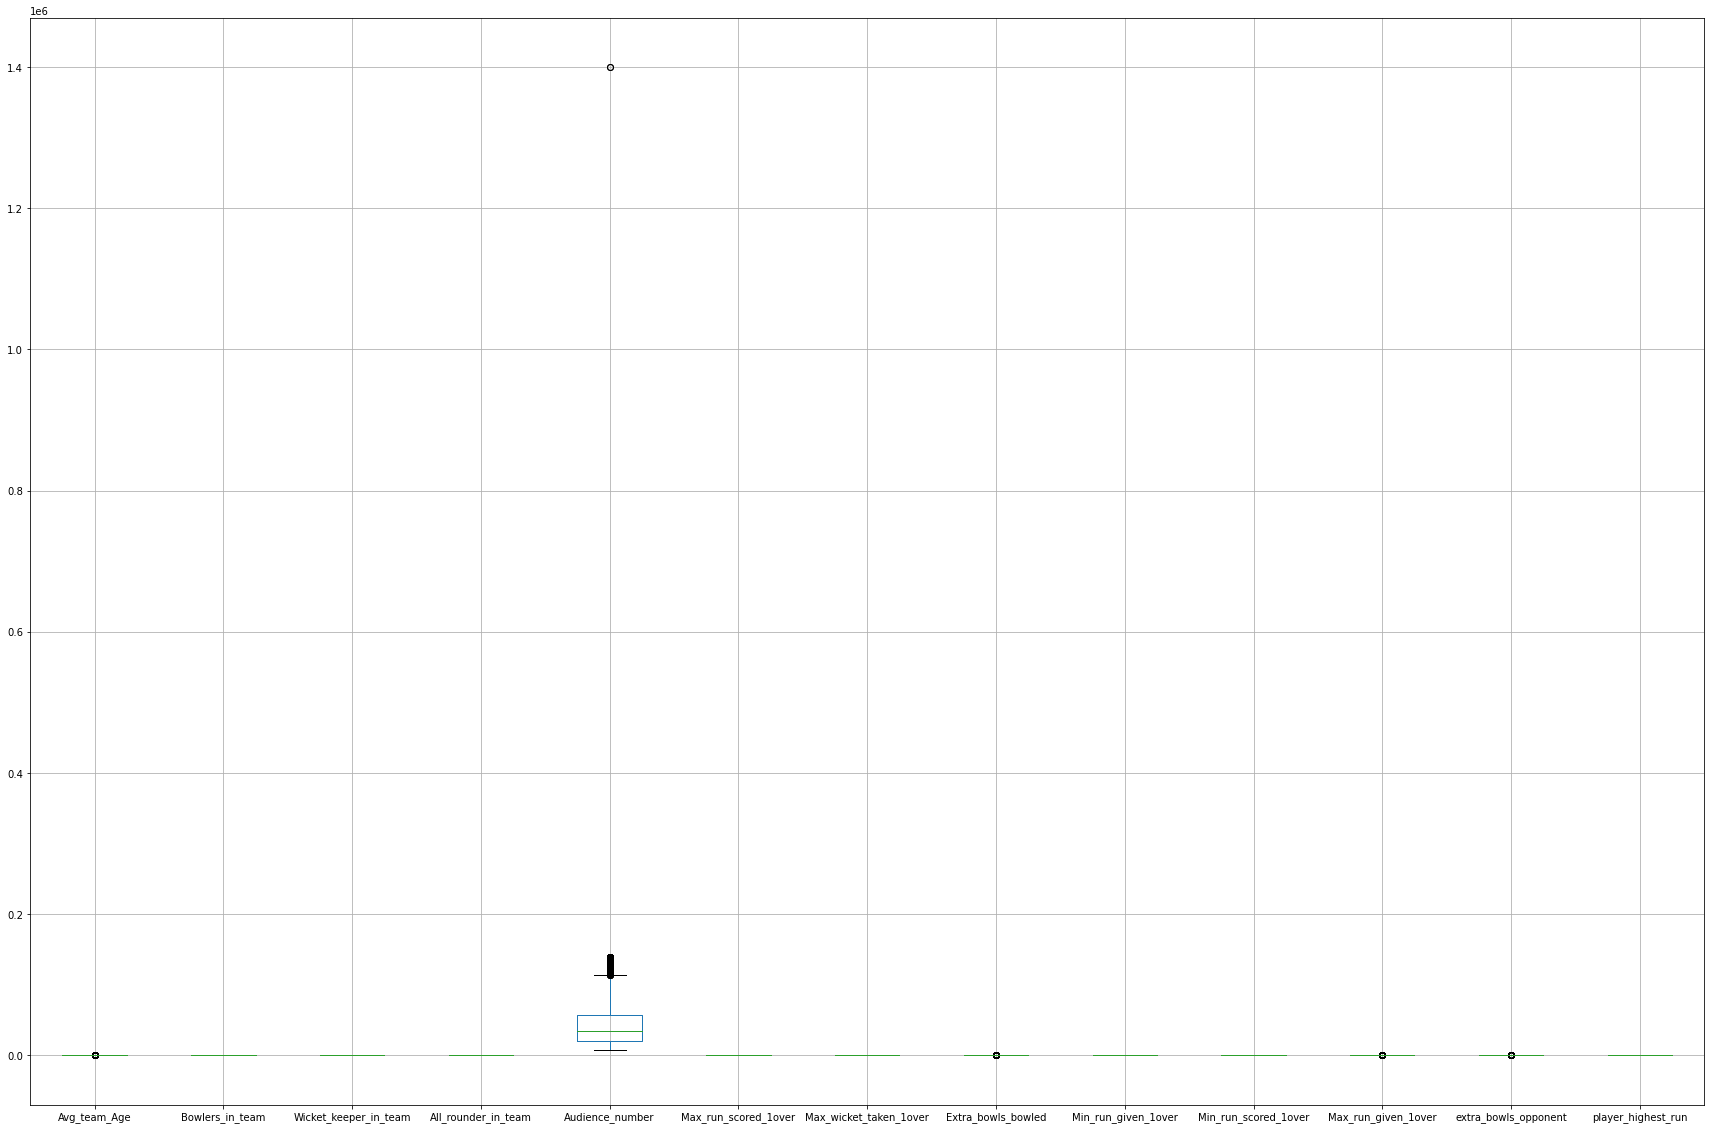

In [25]:
df.boxplot(figsize=(30,20))

In [26]:

def treat_outliers(df, column_name, lower_threshold=0.25, upper_threshold=0.75):

    q1 = df[column_name].quantile(lower_threshold)
    q3 = df[column_name].quantile(upper_threshold)
    iqr = q3 - q1


    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr


    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)


numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    treat_outliers(df, column)

<AxesSubplot:>

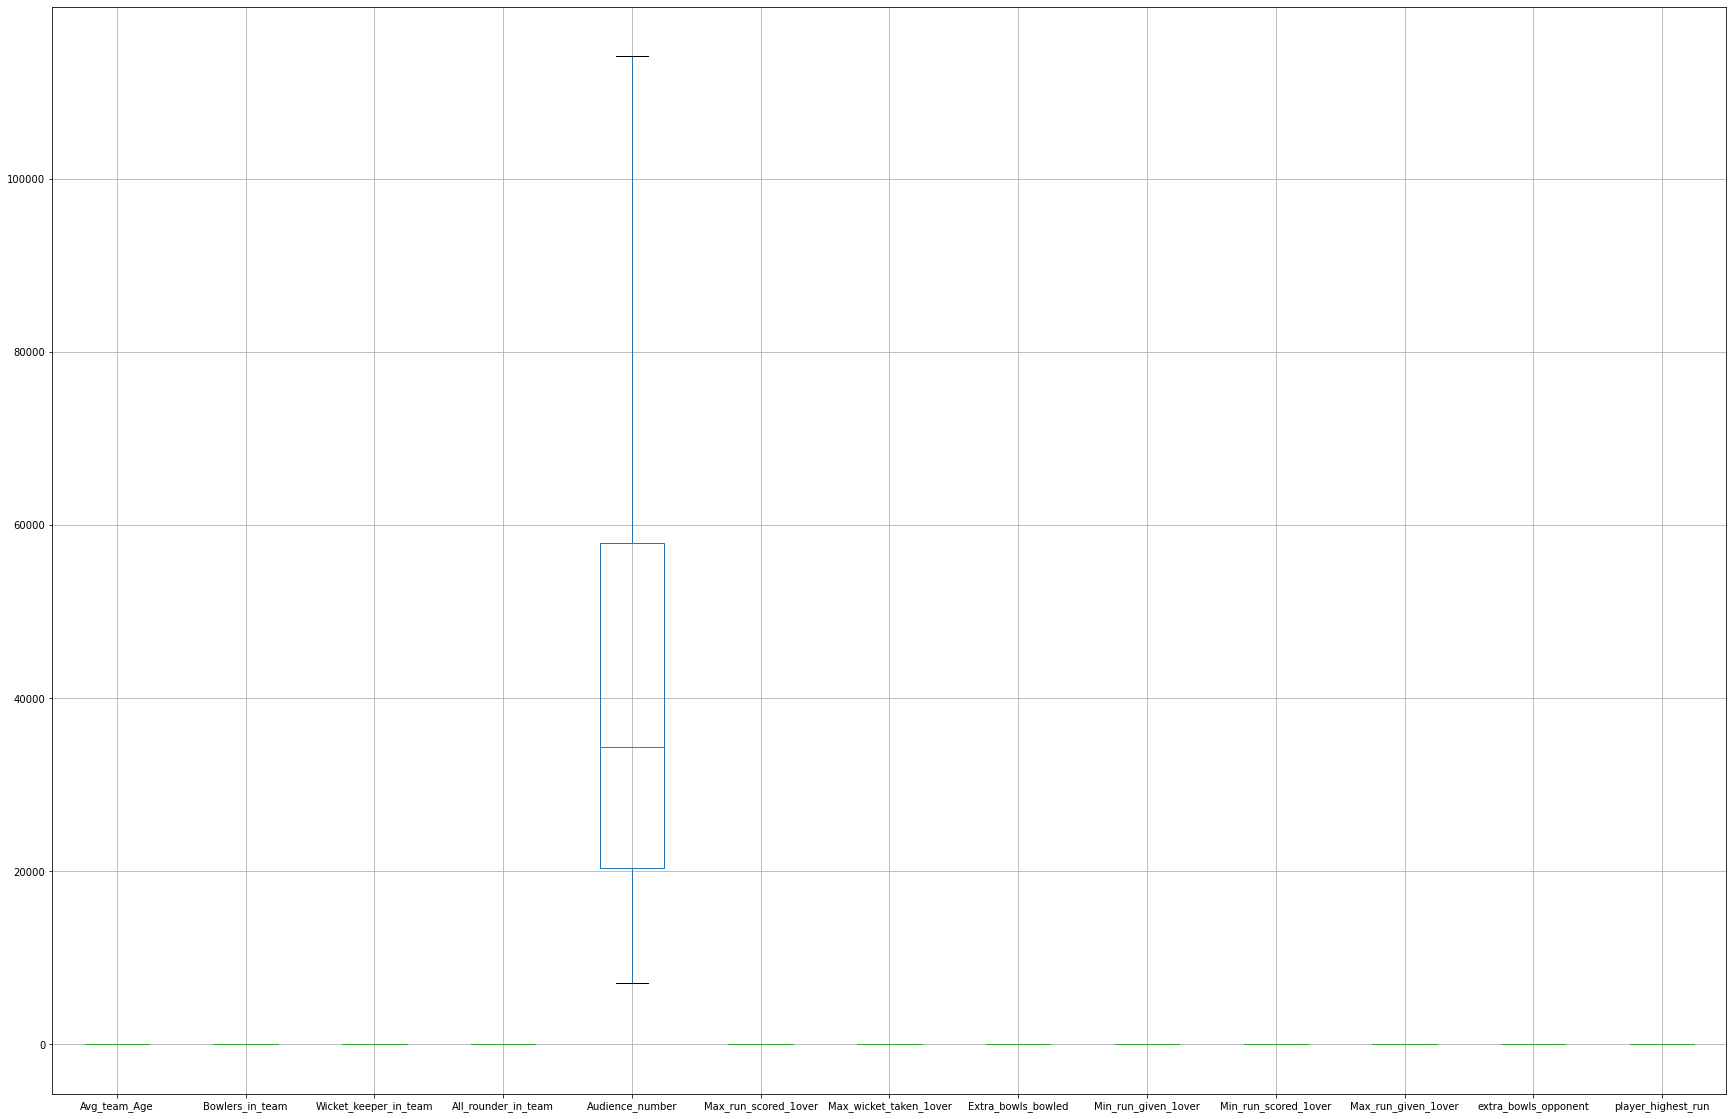

In [27]:
df.boxplot(figsize=(30,20))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [29]:
### Changing data type of columns which are to be considered categorical
df['Bowlers_in_team']=df['Bowlers_in_team'].astype(str)
df['All_rounder_in_team']=df['All_rounder_in_team'].astype(str)
df['Max_wicket_taken_1over']=df['Max_wicket_taken_1over'].astype(str)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2930 non-null   object 
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2930 non-null   object 
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [31]:
df.drop('Wicket_keeper_in_team',axis=1,inplace=True)
df.drop('Game_number',axis=1,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Result                  2930 non-null   object 
 1   Avg_team_Age            2833 non-null   float64
 2   Match_light_type        2878 non-null   object 
 3   Match_format            2860 non-null   object 
 4   Bowlers_in_team         2930 non-null   object 
 5   All_rounder_in_team     2930 non-null   object 
 6   First_selection         2871 non-null   object 
 7   Opponent                2894 non-null   object 
 8   Season                  2868 non-null   object 
 9   Audience_number         2849 non-null   float64
 10  Offshore                2866 non-null   object 
 11  Max_run_scored_1over    2902 non-null   float64
 12  Max_wicket_taken_1over  2930 non-null   object 
 13  Extra_bowls_bowled      2901 non-null   float64
 14  Min_run_given_1over     2930 non-null   

In [33]:
total_rows = df.shape[0]
rows_with_missing = df[df.isnull().any(axis=1)].shape[0]
percentage_missing = (rows_with_missing / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Rows with missing values: {rows_with_missing}")
print(f"Percentage of rows with missing values: {percentage_missing:.2f}%")

Total rows: 2930
Rows with missing values: 617
Percentage of rows with missing values: 21.06%


#### Filling missing values for continous and categorical variables

In [34]:
df1=df.copy()

In [35]:
c=df1.select_dtypes(include=['object']).columns
for col in c:
  df1.drop(columns=col,axis=1,inplace=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_data, columns=df1.columns)

from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def custom_scorer(estimator, X, y=None):
    # This function can be customized based on your specific evaluation criteria
    imputed_data = estimator.transform(X)
    # Calculate some evaluation metric here (e.g., mean squared error)
    score = np.mean((imputed_data - X)**2)
    return -score  # Return the negative score because GridSearchCV minimizes the score

# Create the KNNImputer with the parameters you want to tune
knn_imputer = KNNImputer()

# Define the hyperparameter grid to search
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Create GridSearchCV with your custom scorer
grid_search = GridSearchCV(estimator=knn_imputer, param_grid=param_grid, scoring=make_scorer(custom_scorer), cv=5)

# Fit the imputer with cross-validation
grid_search.fit(scaled_df)

# Get the best estimator and its hyperparameters
best_imputer = grid_search.best_estimator_
best_params = grid_search.best_params_

# Use the best imputer to impute your data
imputed_data = best_imputer.transform(scaled_df)
data = pd.DataFrame(imputed_data, columns=scaled_df.columns)


C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Vishesh\anaconda3\lib

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2930.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Audience_number,2930.0,3.861643e-03,0.998172,-1.237824,-0.789125,-0.321788,0.444041,2.326028
Max_run_scored_1over,2930.0,4.140255e-03,0.998598,-1.147385,-0.874189,-0.327797,0.764986,2.677356
Extra_bowls_bowled,2930.0,4.906971e-03,1.001158,-1.517061,-0.695239,-0.147358,0.537494,2.386594
Min_run_given_1over,2930.0,3.798251e-16,1.000171,-1.163591,-1.163591,0.028271,0.624202,2.411996
Min_run_scored_1over,2930.0,8.423303e-04,0.997224,-2.497969,-1.080810,0.336350,0.336350,1.753509
Max_run_given_1over,2930.0,4.142188e-04,0.999411,-0.678312,-0.678312,-0.678312,0.381016,2.190702
extra_bowls_opponent,2930.0,-5.904265e-16,1.000171,-1.182891,-0.620706,-0.339613,0.784757,2.892950
player_highest_run,2930.0,8.914701e-04,0.998528,-1.765505,-0.880032,0.005441,0.890915,1.678002


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg_team_Age          2930 non-null   float64
 1   Audience_number       2930 non-null   float64
 2   Max_run_scored_1over  2930 non-null   float64
 3   Extra_bowls_bowled    2930 non-null   float64
 4   Min_run_given_1over   2930 non-null   float64
 5   Min_run_scored_1over  2930 non-null   float64
 6   Max_run_given_1over   2930 non-null   float64
 7   extra_bowls_opponent  2930 non-null   float64
 8   player_highest_run    2930 non-null   float64
dtypes: float64(9)
memory usage: 206.1 KB


In [38]:
original_data = scaler.inverse_transform(data)


original_df = pd.DataFrame(original_data, columns=data.columns)


rounded_df = original_df.round(0)

In [39]:
rounded_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2930.0,30.000000,0.000000,30.0,30.0,30.0,30.0,30.0
Audience_number,2930.0,44371.775768,29992.021789,7063.0,20545.0,34587.0,57598.0,114146.0
Max_run_scored_1over,2930.0,15.214676,3.656279,11.0,12.0,14.0,18.0,25.0
Extra_bowls_bowled,2930.0,11.090102,7.259145,0.0,6.0,10.0,15.0,28.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.0,6.0
Min_run_scored_1over,2930.0,2.763140,0.703990,1.0,2.0,3.0,3.0,4.0
Max_run_given_1over,2930.0,7.908532,2.800861,6.0,6.0,6.0,9.0,14.0
extra_bowls_opponent,2930.0,4.201024,3.537855,0.0,2.0,3.0,7.0,14.0
player_highest_run,2930.0,65.906826,20.298234,30.0,48.0,66.0,84.0,100.0


In [40]:
df2=df.copy()
d=df2.select_dtypes(include=['int','float']).columns
for col in d:
  df2.drop(columns=col,axis=1,inplace=True)

In [41]:
df3 = pd.concat([rounded_df, df2], axis=1)

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Avg_team_Age            2930 non-null   float64
 1   Audience_number         2930 non-null   float64
 2   Max_run_scored_1over    2930 non-null   float64
 3   Extra_bowls_bowled      2930 non-null   float64
 4   Min_run_given_1over     2930 non-null   float64
 5   Min_run_scored_1over    2930 non-null   float64
 6   Max_run_given_1over     2930 non-null   float64
 7   extra_bowls_opponent    2930 non-null   float64
 8   player_highest_run      2930 non-null   float64
 9   Result                  2930 non-null   object 
 10  Match_light_type        2878 non-null   object 
 11  Match_format            2860 non-null   object 
 12  Bowlers_in_team         2930 non-null   object 
 13  All_rounder_in_team     2930 non-null   object 
 14  First_selection         2871 non-null   

In [43]:
categorical_columns = df3.select_dtypes(include=['object']).columns

for col in categorical_columns:
    mode_value = df3[col].mode()[0]
    df3[col].fillna(mode_value, inplace=True)

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Avg_team_Age            2930 non-null   float64
 1   Audience_number         2930 non-null   float64
 2   Max_run_scored_1over    2930 non-null   float64
 3   Extra_bowls_bowled      2930 non-null   float64
 4   Min_run_given_1over     2930 non-null   float64
 5   Min_run_scored_1over    2930 non-null   float64
 6   Max_run_given_1over     2930 non-null   float64
 7   extra_bowls_opponent    2930 non-null   float64
 8   player_highest_run      2930 non-null   float64
 9   Result                  2930 non-null   object 
 10  Match_light_type        2930 non-null   object 
 11  Match_format            2930 non-null   object 
 12  Bowlers_in_team         2930 non-null   object 
 13  All_rounder_in_team     2930 non-null   object 
 14  First_selection         2930 non-null   

In [45]:
df3['Result']=np.where(df3['Result']=='Loss',0,df3['Result'])
df3['Result']=np.where(df3['Result']=='Win',1,df3['Result'])

In [46]:
df3['Result']=df3['Result'].astype(int)

In [47]:
df3['Result'].unique()

array([0, 1])

#EDA and clustering

#### Univariate Analysis

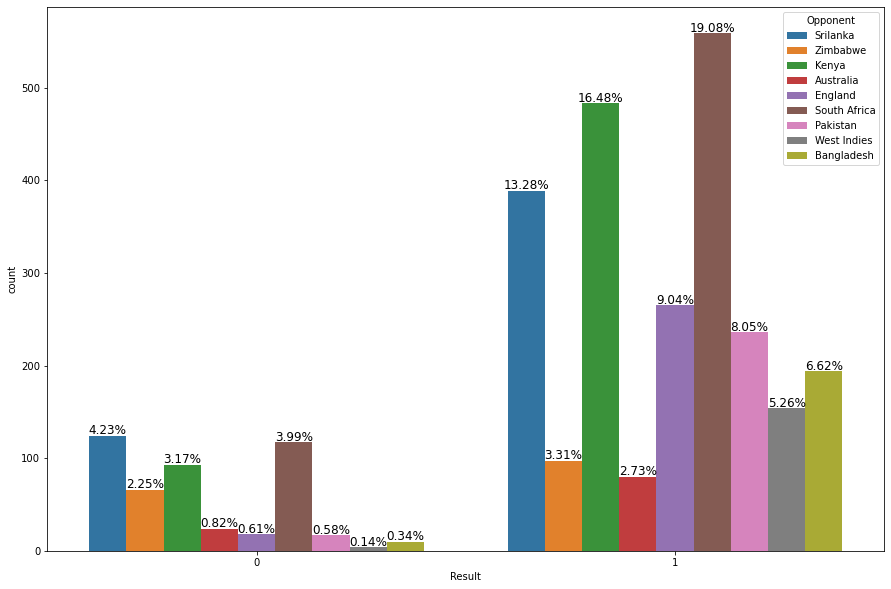

In [48]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='Opponent');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

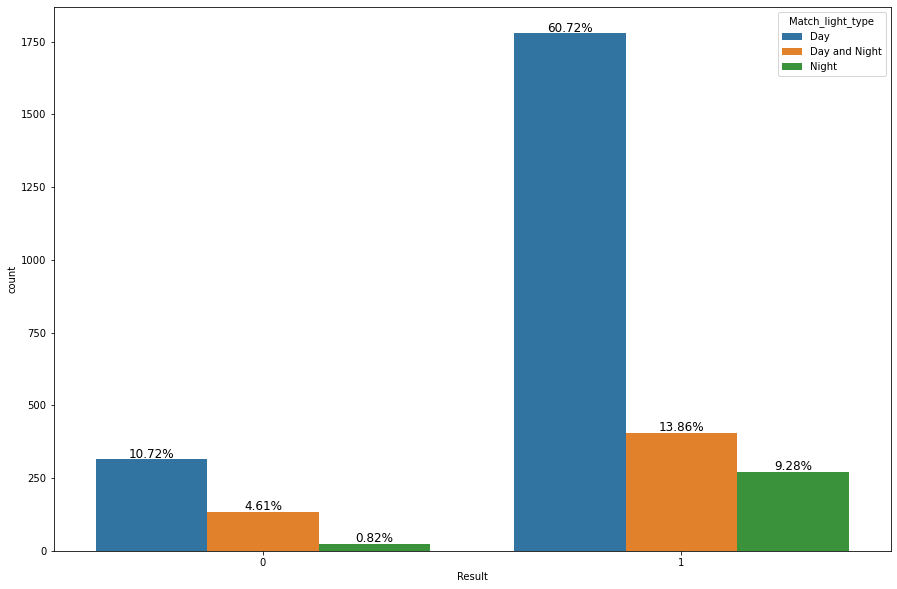

In [49]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='Match_light_type');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

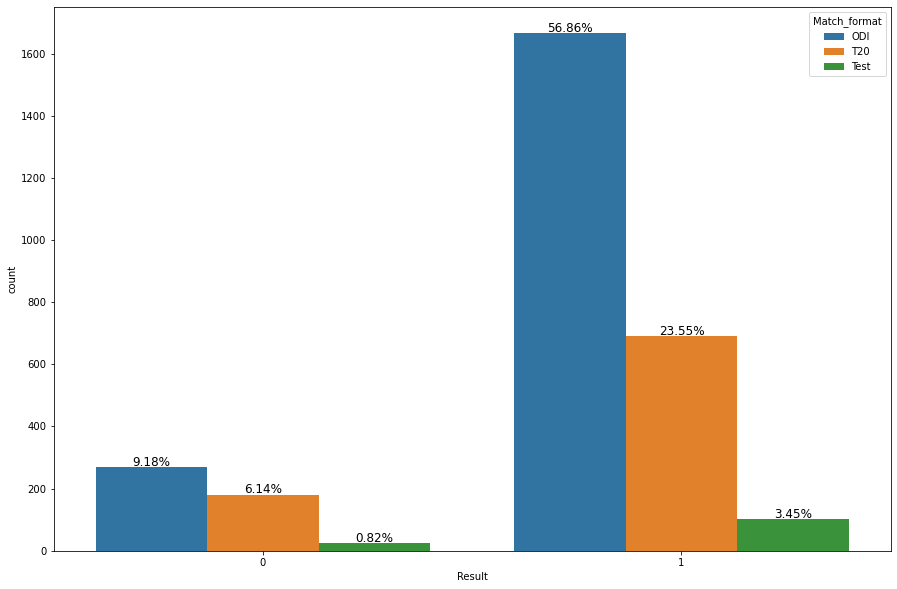

In [50]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='Match_format');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

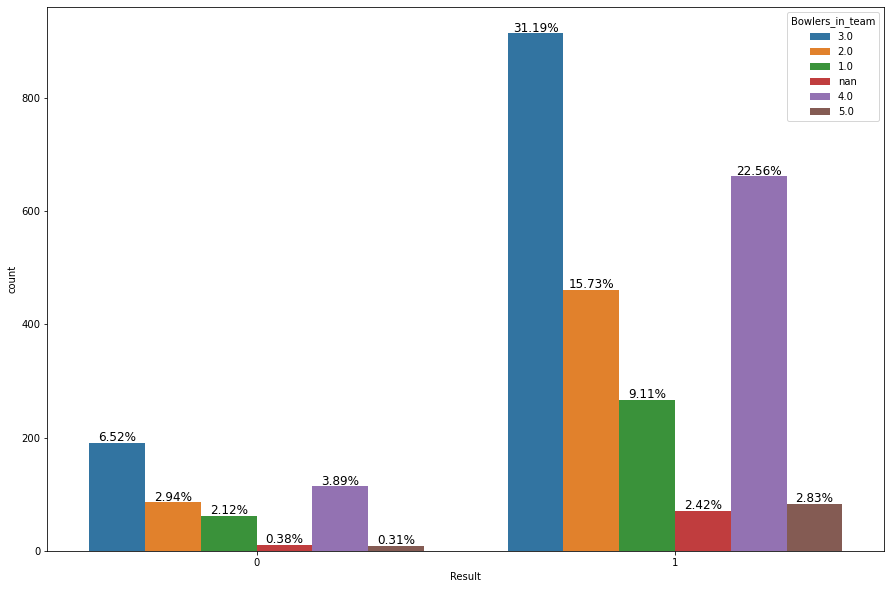

In [51]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='Bowlers_in_team');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

In [52]:
df3['Bowlers_in_team'].nunique()

6

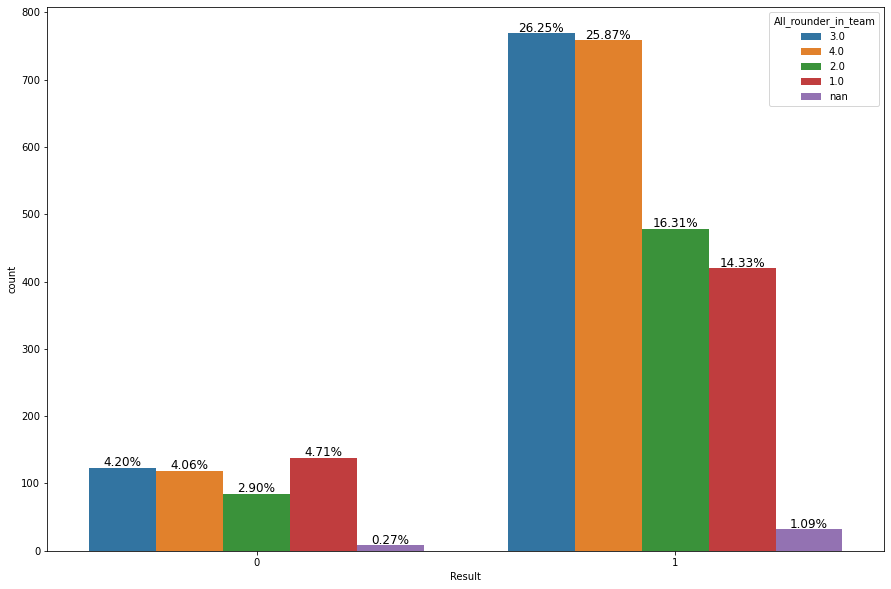

In [53]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='All_rounder_in_team');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

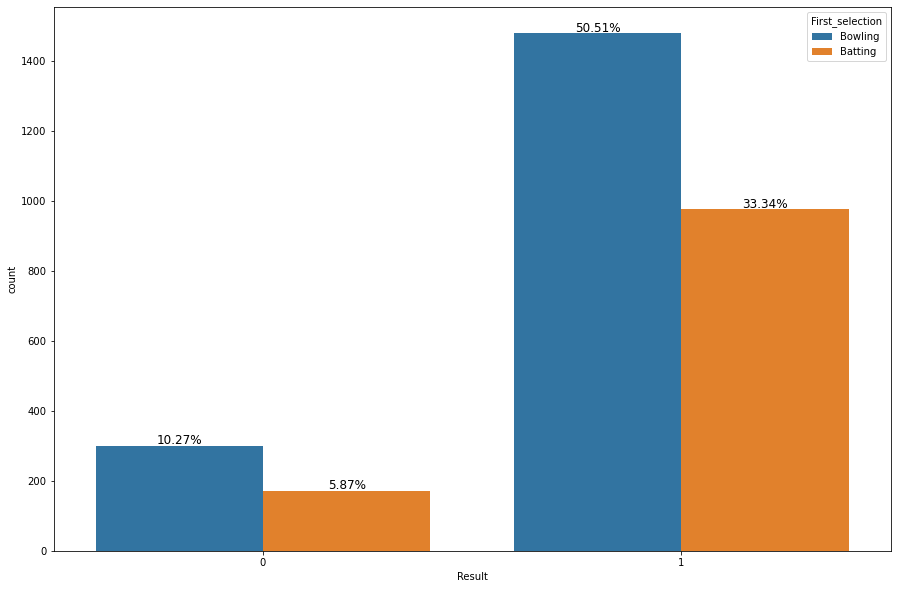

In [54]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='First_selection');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

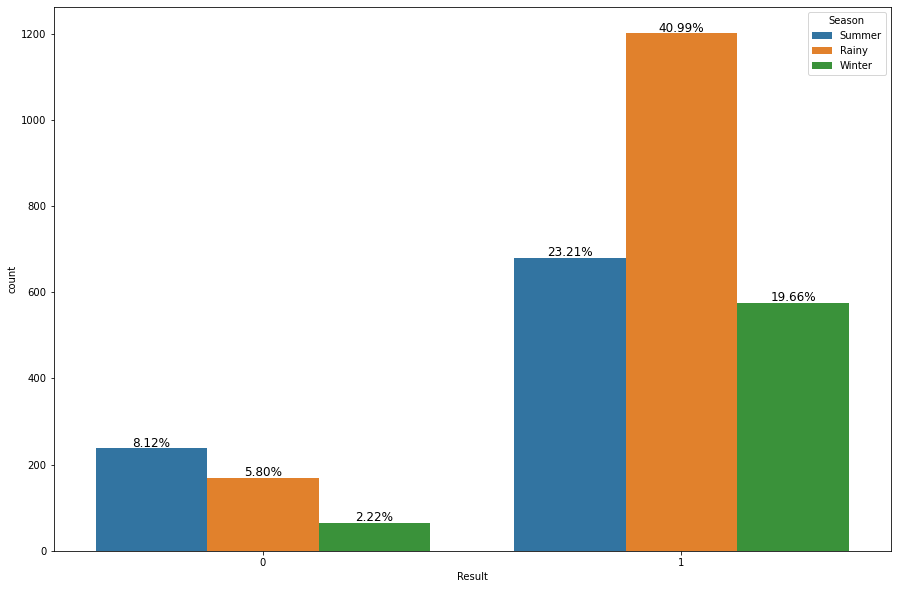

In [55]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='Season');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

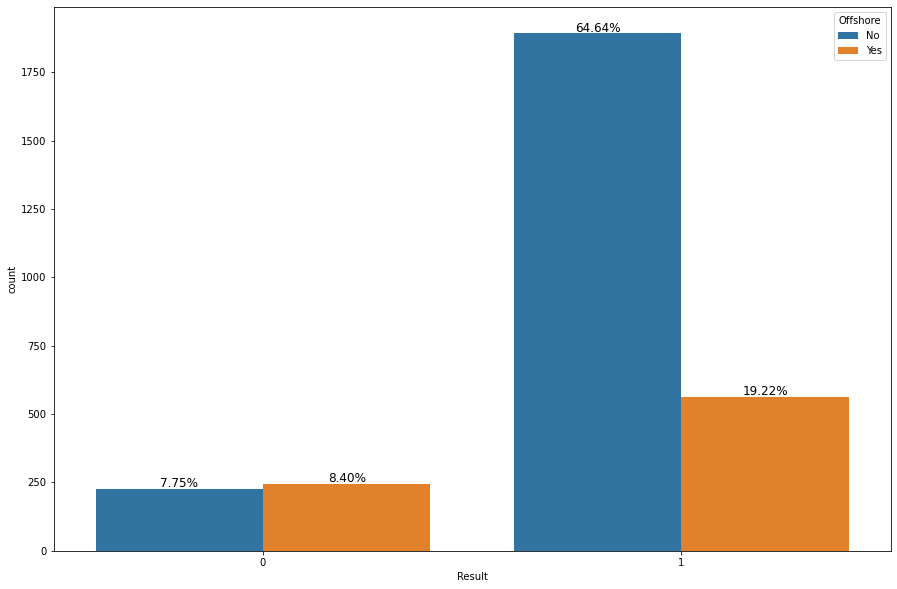

In [56]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='Offshore');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

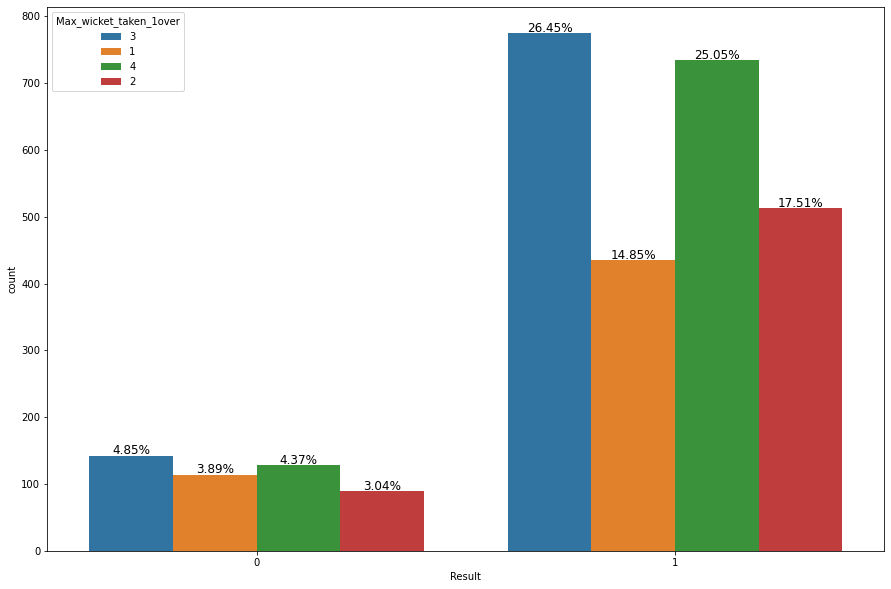

In [57]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='Max_wicket_taken_1over');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

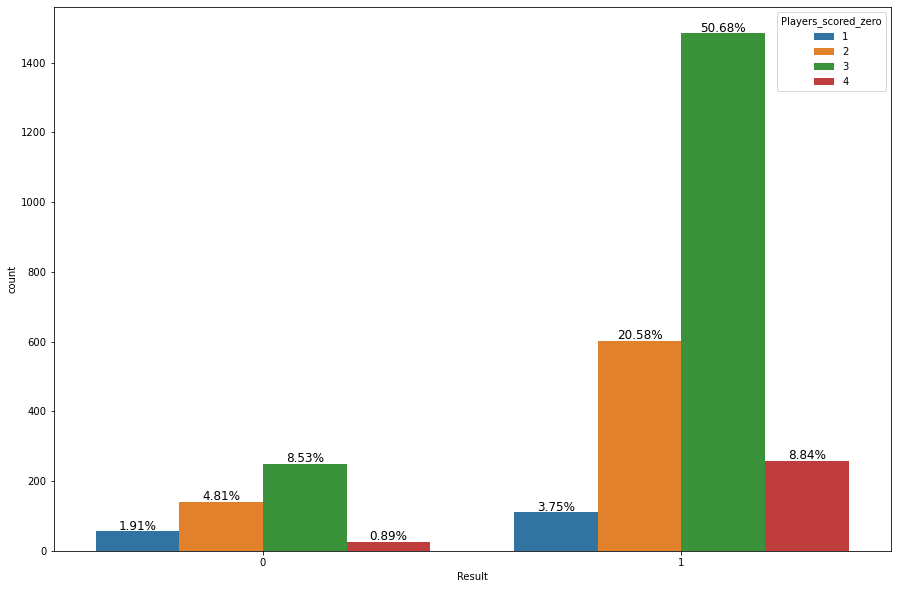

In [58]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='Players_scored_zero');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

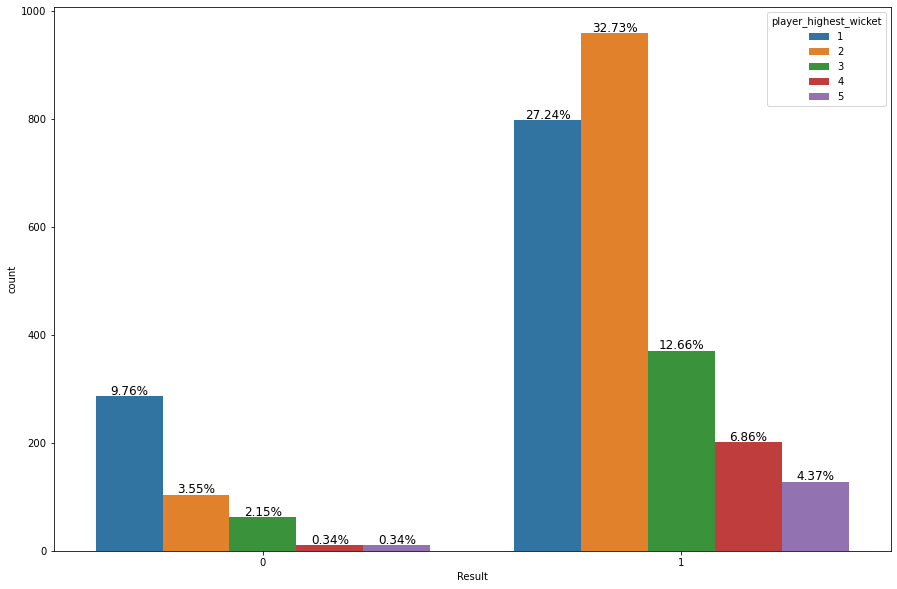

In [59]:


plt.figure(figsize=(15,10))
ax=sns.countplot(data=df3, x='Result',hue='player_highest_wicket');

total = len(df3)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

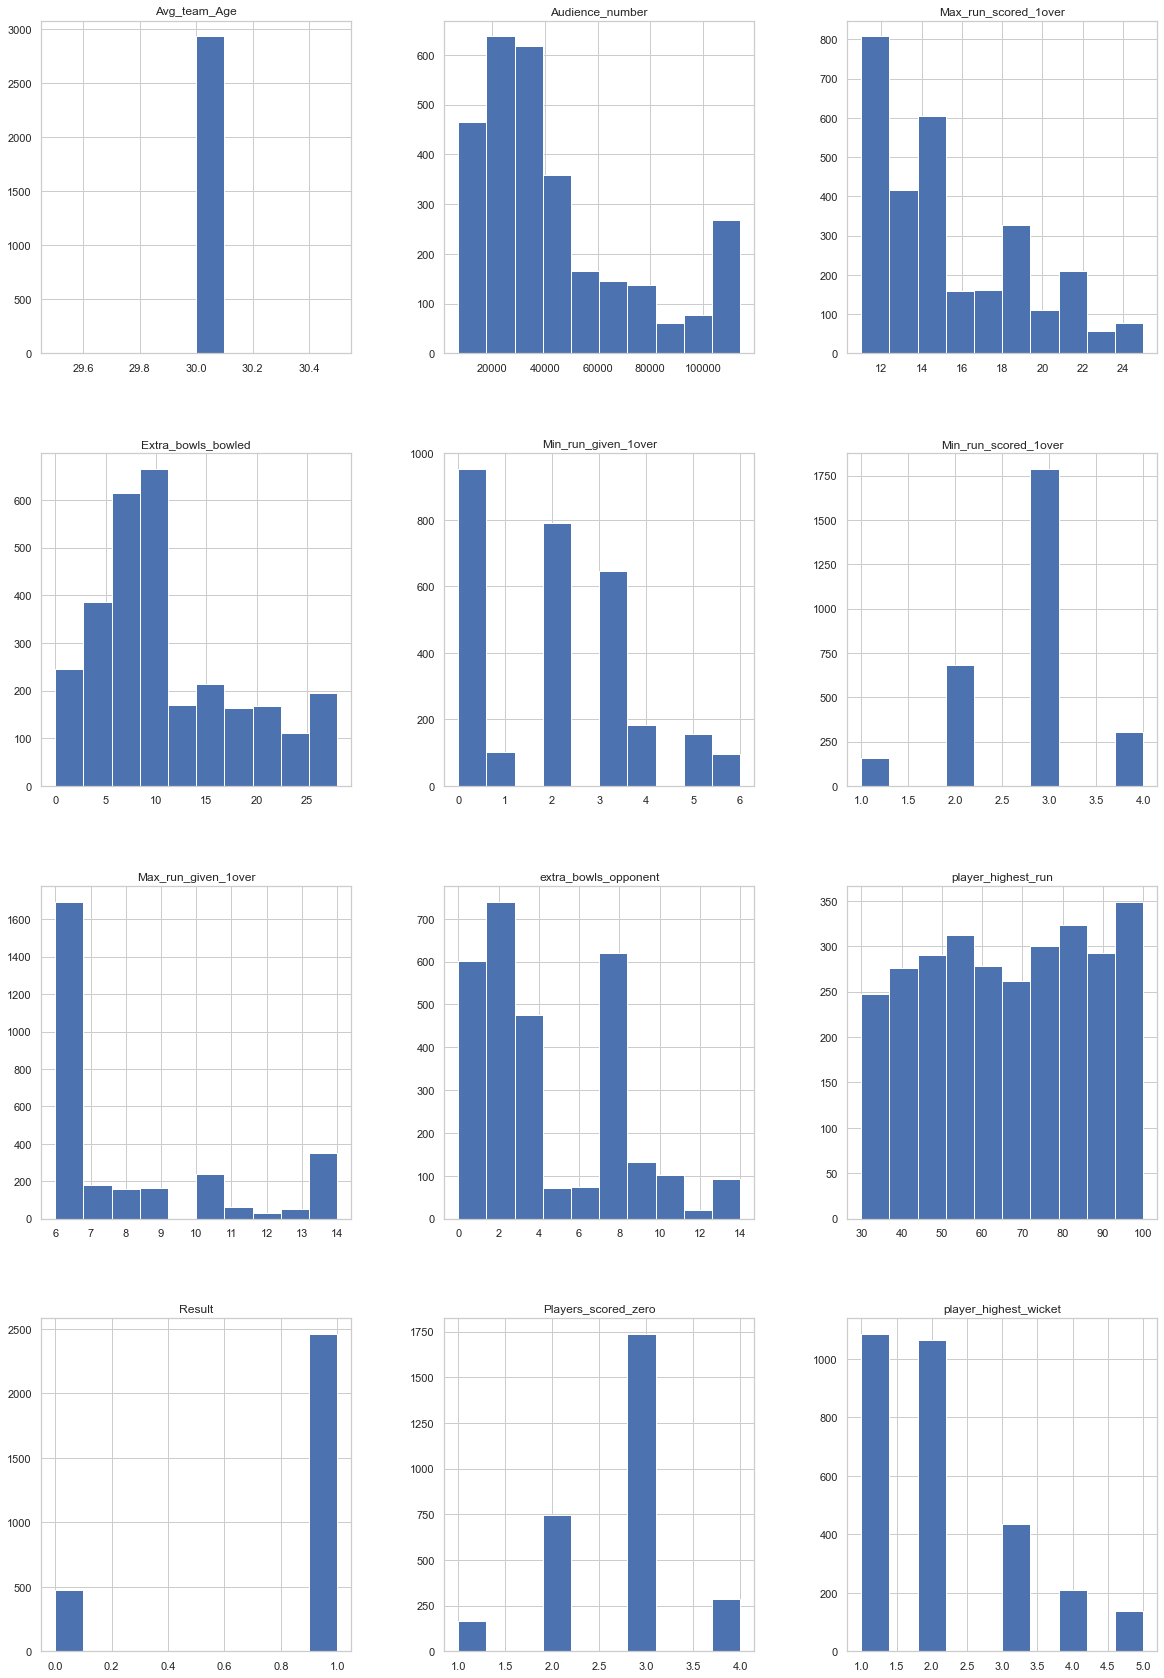

In [294]:

df3.hist(figsize=(20,30));

### Bivariate

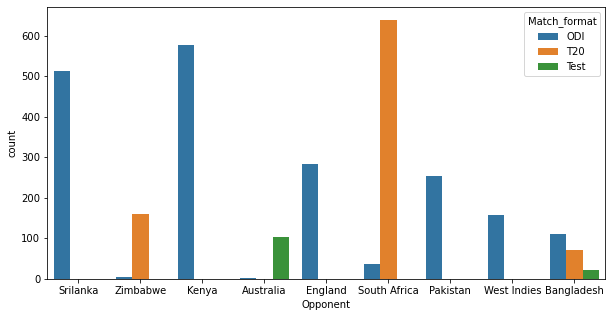

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(data=df3, x='Opponent',hue='Match_format');

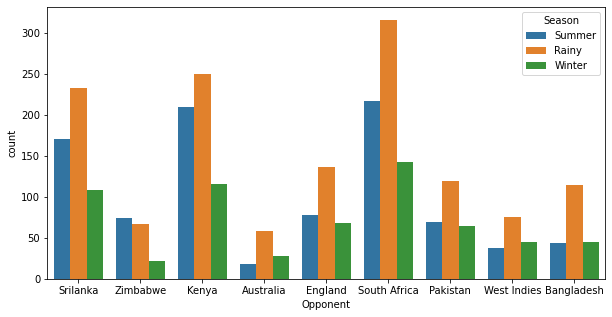

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(data=df3, x='Opponent',hue='Season');

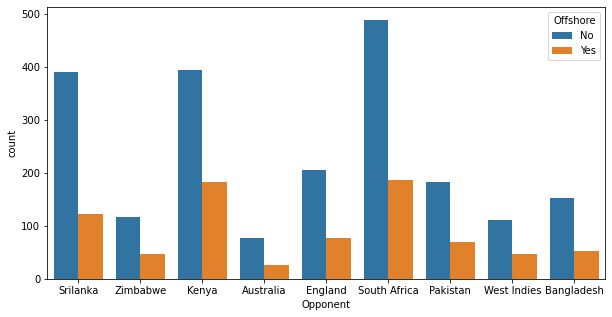

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(data=df3, x='Opponent',hue='Offshore');

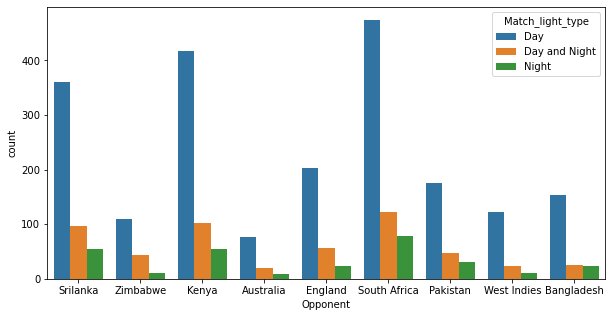

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(data=df3, x='Opponent',hue='Match_light_type');

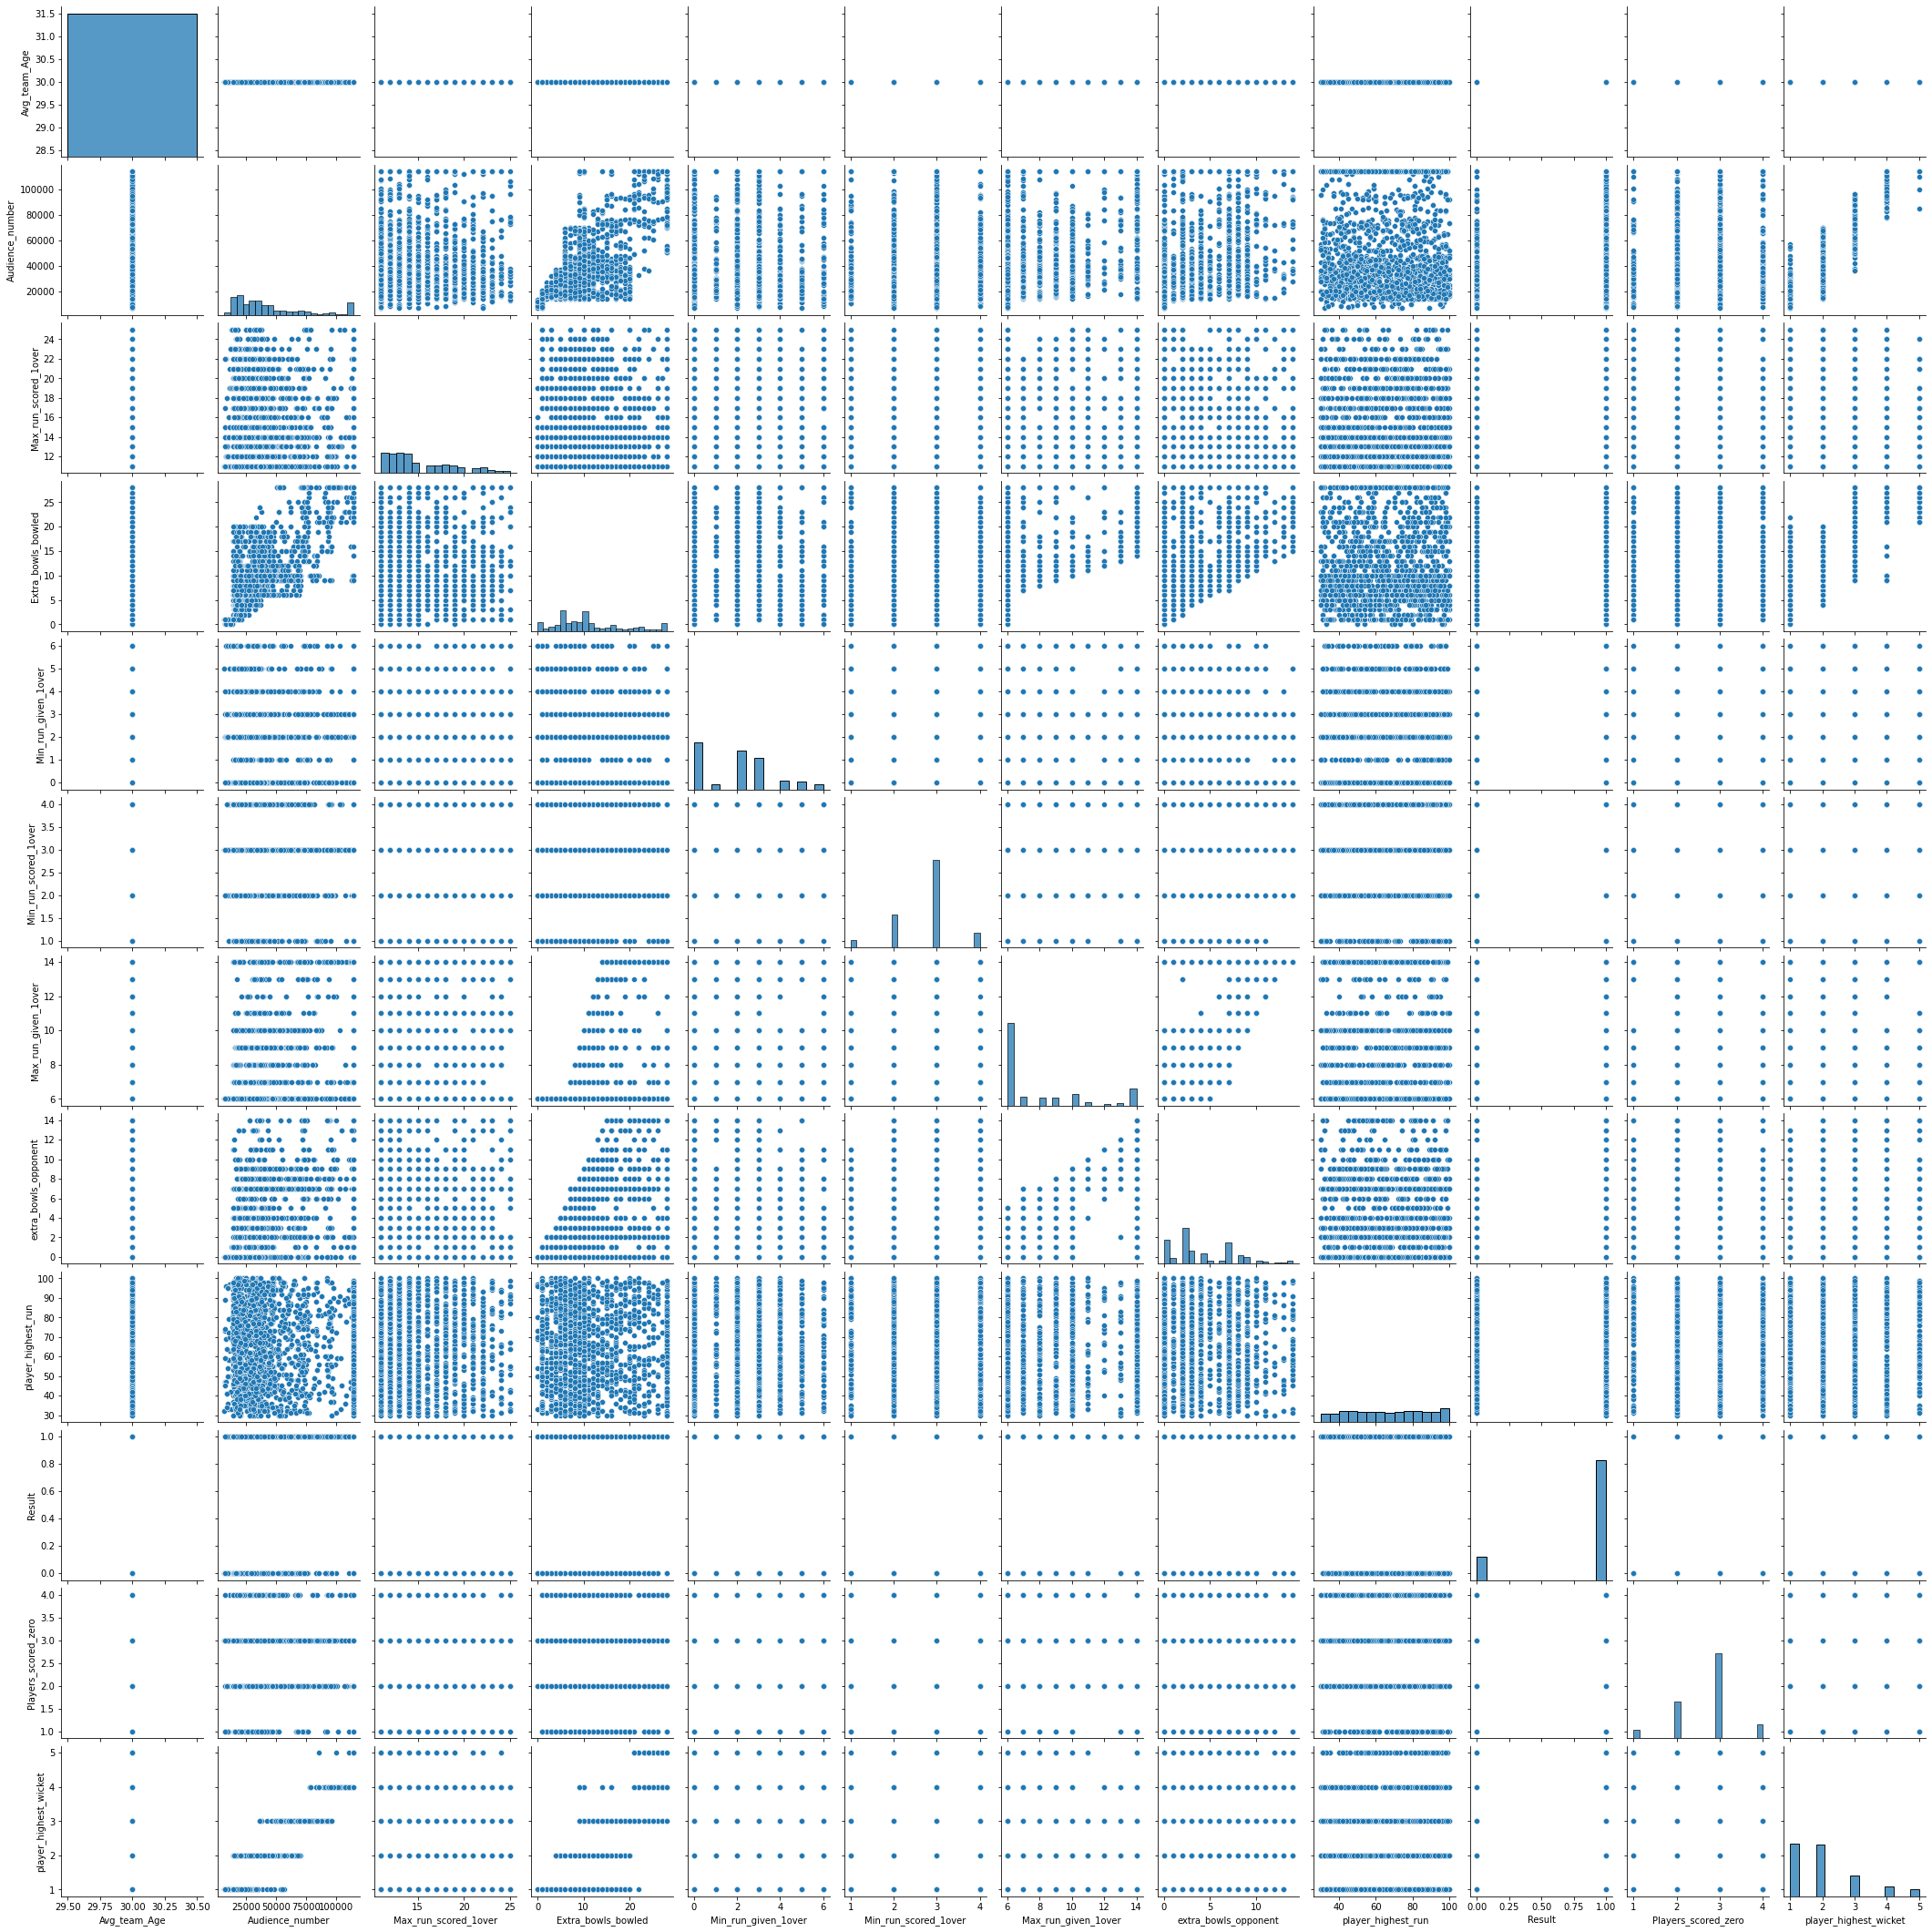

In [64]:
sns.pairplot(data=df3)

<AxesSubplot:>

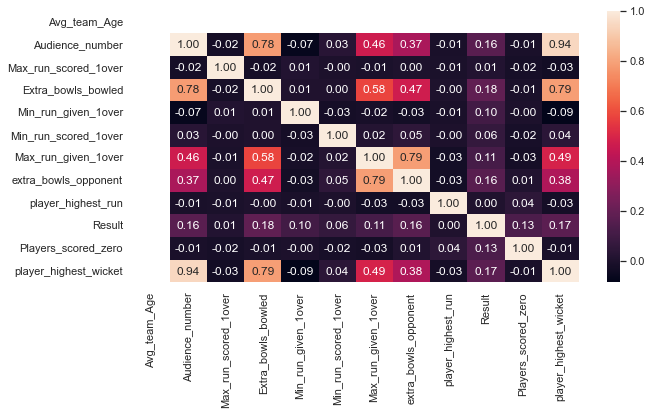

In [299]:
plt.figure(figsize=(10,5))
cm=df3.corr()
sns.heatmap(cm, annot=True,fmt='.2f')

<Figure size 720x360 with 0 Axes>

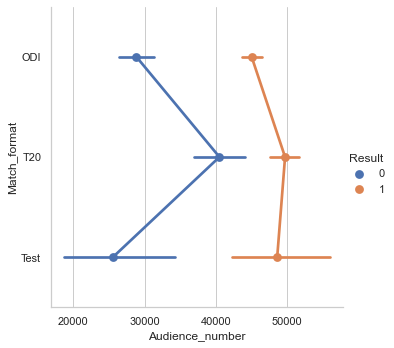

In [303]:
plt.figure(figsize=(10,5))
sns.catplot(data=df3,x='Audience_number',y='Match_format',hue='Result',kind='point')

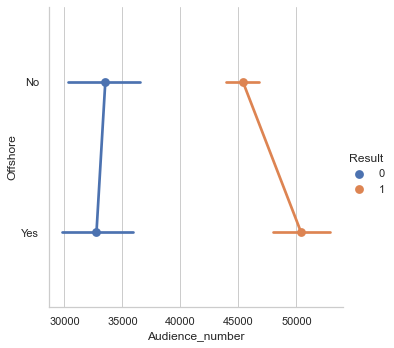

In [304]:
sns.catplot(data=df3,x='Audience_number',y='Offshore',hue='Result',kind='point')

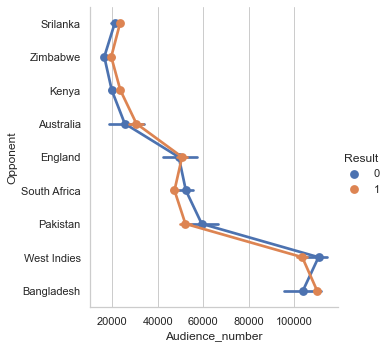

In [305]:
sns.catplot(data=df3,x='Audience_number',y='Opponent',hue='Result',kind='point')

<AxesSubplot:>

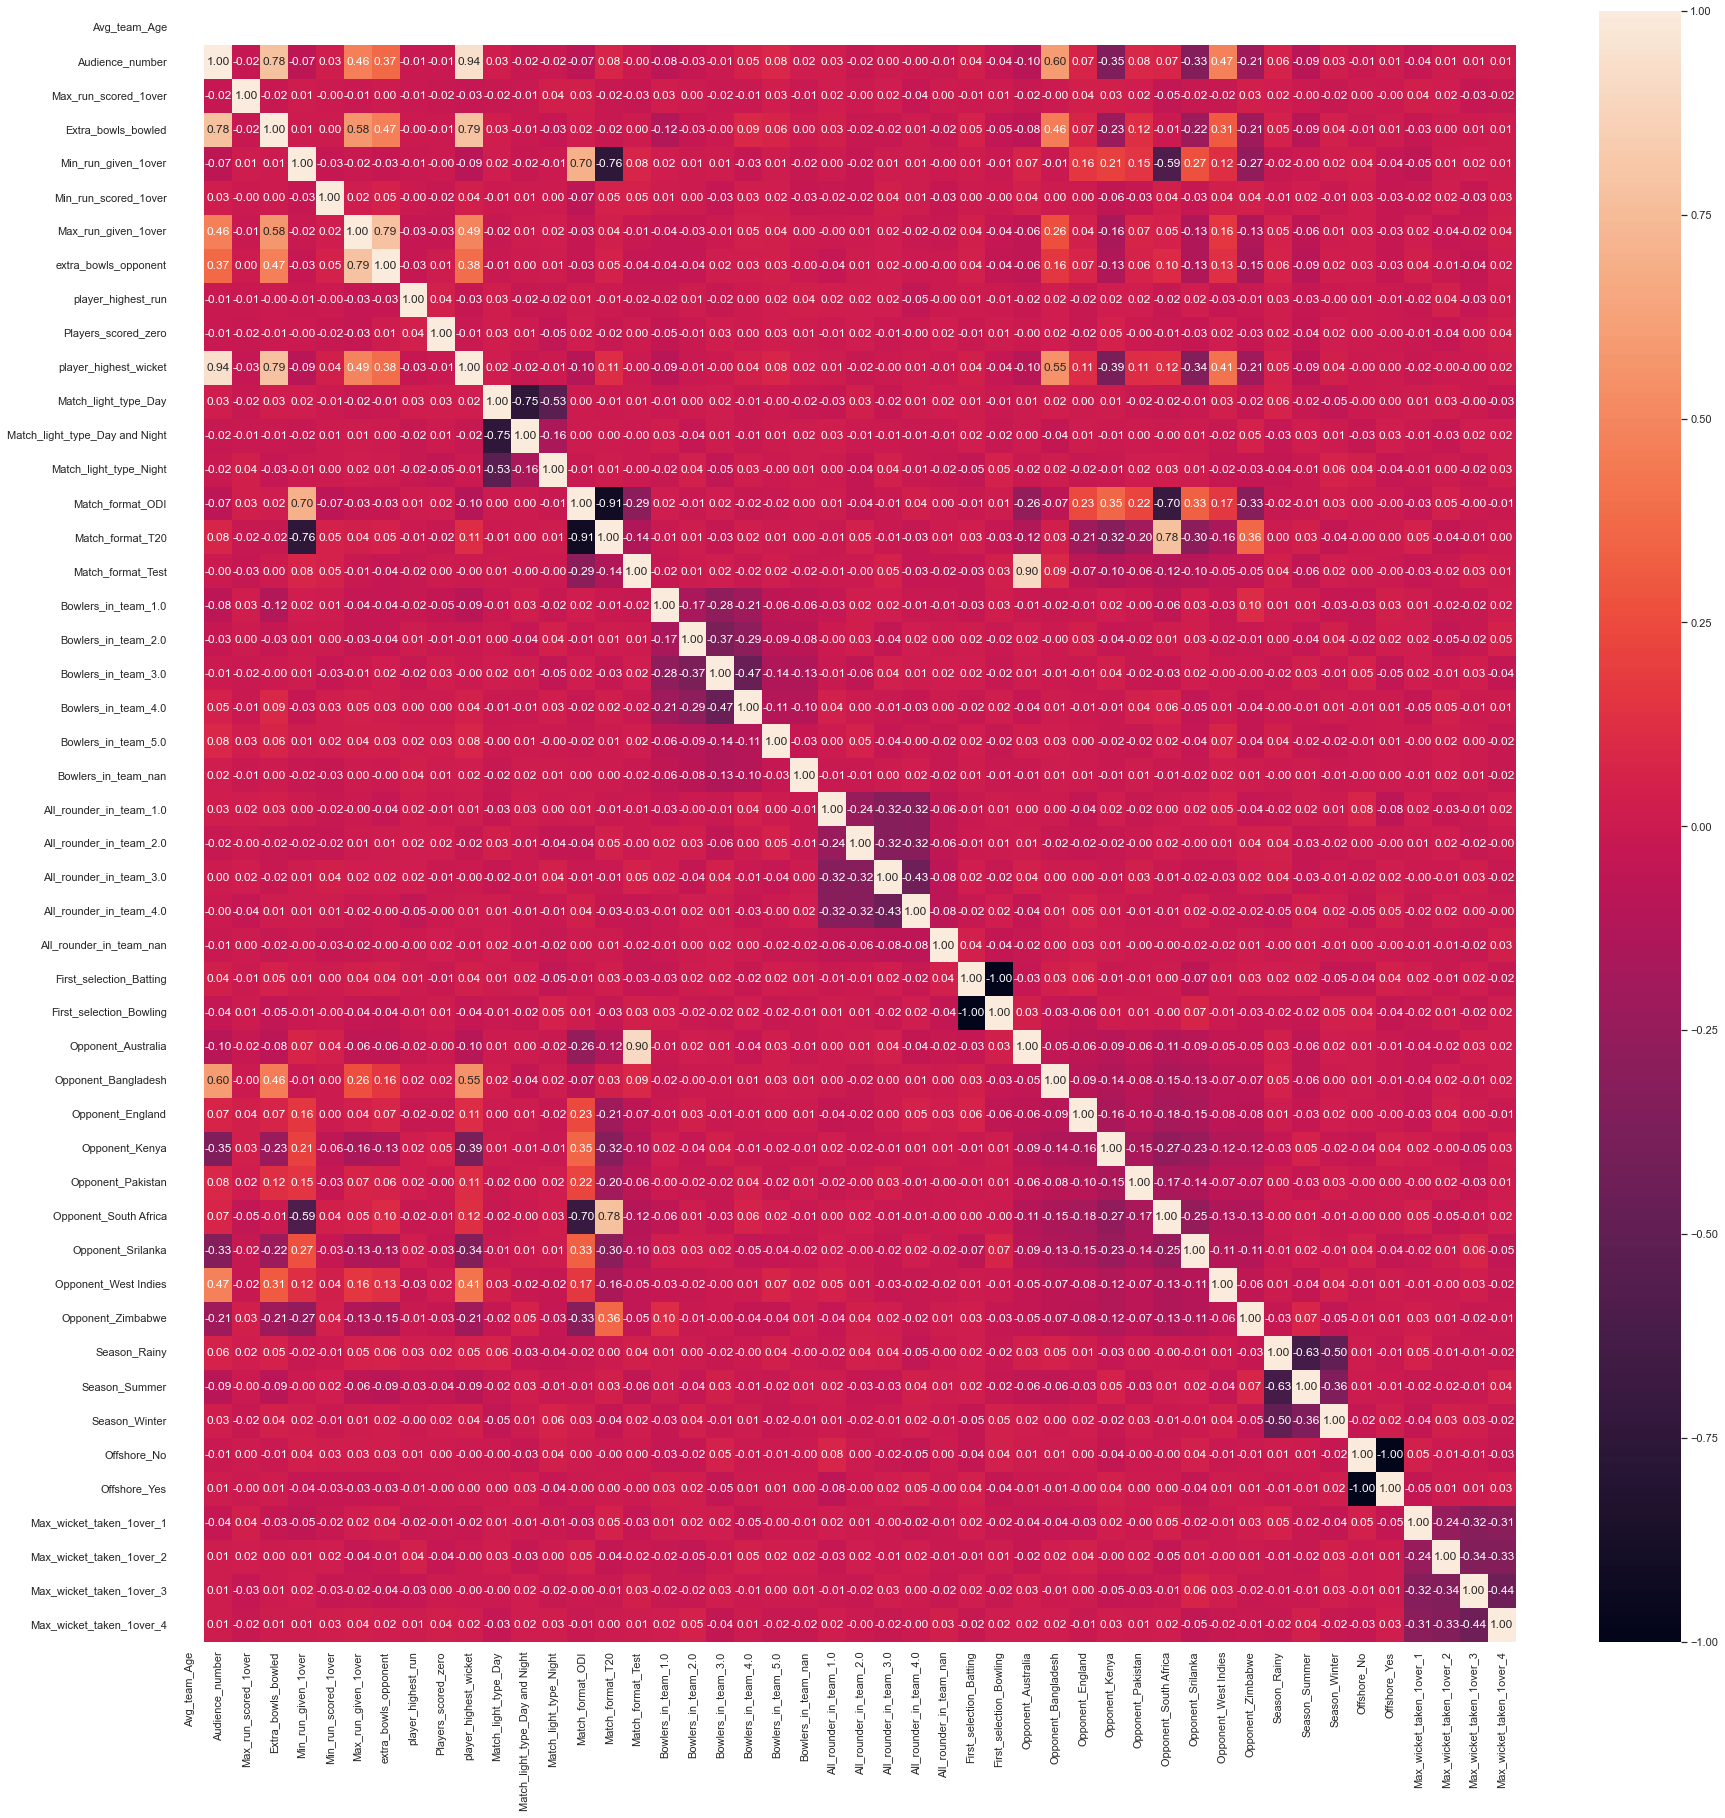

In [298]:
plt.figure(figsize=(30,30))
cm=df4.corr()
sns.heatmap(cm, annot=True,fmt='.2f')

# Predictive modelling

In [72]:
### Encoding categorical columns
categorical_columns = df3.select_dtypes(include=['object']).columns

df4=pd.get_dummies(df3,columns=categorical_columns)

In [73]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Avg_team_Age                    2930 non-null   float64
 1   Audience_number                 2930 non-null   float64
 2   Max_run_scored_1over            2930 non-null   float64
 3   Extra_bowls_bowled              2930 non-null   float64
 4   Min_run_given_1over             2930 non-null   float64
 5   Min_run_scored_1over            2930 non-null   float64
 6   Max_run_given_1over             2930 non-null   float64
 7   extra_bowls_opponent            2930 non-null   float64
 8   player_highest_run              2930 non-null   float64
 9   Result                          2930 non-null   int32  
 10  Players_scored_zero             2930 non-null   int64  
 11  player_highest_wicket           2930 non-null   int64  
 12  Match_light_type_Day            29

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [75]:
x = df4.drop("Result" , axis=1)
y = df4.pop("Result")

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [77]:
#using Recursive Feature Elimination with Cross-Validation for selecting best no. of features

In [78]:
from sklearn.feature_selection import RFECV
model = LogisticRegression()
rfecv = RFECV(estimator=model, cv=5)

rfecv.fit(x, y)
selected_features = x.columns[rfecv.support_]
optimal_num_features = rfecv.n_features_


C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [79]:
print("Optimal Number of Features:", optimal_num_features)
print("Selected Features:")
print(selected_features)

Optimal Number of Features: 38
Selected Features:
Index(['Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over',
       'extra_bowls_opponent', 'Players_scored_zero', 'Match_light_type_Day',
       'Match_light_type_Day and Night', 'Match_light_type_Night',
       'Match_format_ODI', 'Match_format_Test', 'Bowlers_in_team_3.0',
       'Bowlers_in_team_4.0', 'Bowlers_in_team_5.0', 'Bowlers_in_team_nan',
       'All_rounder_in_team_1.0', 'All_rounder_in_team_2.0',
       'All_rounder_in_team_3.0', 'All_rounder_in_team_4.0',
       'All_rounder_in_team_nan', 'First_selection_Batting',
       'First_selection_Bowling', 'Opponent_Australia', 'Opponent_Bangladesh',
       'Opponent_England', 'Opponent_Pakistan', 'Opponent_South Africa',
       'Opponent_Srilanka', 'Opponent_West Indies', 'Opponent_Zimbabwe',
       'Season_Rainy', 'Season_Summer', 'Season_Winter', 'Offshore_No',
       'Offshore_Yes', 'Max_wicket_taken_1over_1', 'Max_wicket_taken_1over_2',
       'Max_wicket_tak

In [80]:
### Match format T20 is not being selected here but we will still keep it in order to solve our problem statement

z=pd.DataFrame(selected_features)

In [81]:
z.head(40)

,0
0,Min_run_given_1over
1,Min_run_scored_1over
2,Max_run_given_1over
3,extra_bowls_opponent
4,Players_scored_zero
5,Match_light_type_Day
6,Match_light_type_Day and Night
7,Match_light_type_Night
8,Match_format_ODI
9,Match_format_Test


In [82]:
new_row = {0:'Match_format_T20' }
z = z.append(new_row, ignore_index=True)

C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\943842777.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  z = z.append(new_row, ignore_index=True)


In [83]:
z.head(50)

,0
0,Min_run_given_1over
1,Min_run_scored_1over
2,Max_run_given_1over
3,extra_bowls_opponent
4,Players_scored_zero
5,Match_light_type_Day
6,Match_light_type_Day and Night
7,Match_light_type_Night
8,Match_format_ODI
9,Match_format_Test


In [84]:
sc=z[0]
sc

0                Min_run_given_1over
1               Min_run_scored_1over
2                Max_run_given_1over
3               extra_bowls_opponent
4                Players_scored_zero
5               Match_light_type_Day
6     Match_light_type_Day and Night
7             Match_light_type_Night
8                   Match_format_ODI
9                  Match_format_Test
10               Bowlers_in_team_3.0
11               Bowlers_in_team_4.0
12               Bowlers_in_team_5.0
13               Bowlers_in_team_nan
14           All_rounder_in_team_1.0
15           All_rounder_in_team_2.0
16           All_rounder_in_team_3.0
17           All_rounder_in_team_4.0
18           All_rounder_in_team_nan
19           First_selection_Batting
20           First_selection_Bowling
21                Opponent_Australia
22               Opponent_Bangladesh
23                  Opponent_England
24                 Opponent_Pakistan
25             Opponent_South Africa
26                 Opponent_Srilanka
2

In [85]:
xf = x[sc]
xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Min_run_given_1over             2930 non-null   float64
 1   Min_run_scored_1over            2930 non-null   float64
 2   Max_run_given_1over             2930 non-null   float64
 3   extra_bowls_opponent            2930 non-null   float64
 4   Players_scored_zero             2930 non-null   int64  
 5   Match_light_type_Day            2930 non-null   uint8  
 6   Match_light_type_Day and Night  2930 non-null   uint8  
 7   Match_light_type_Night          2930 non-null   uint8  
 8   Match_format_ODI                2930 non-null   uint8  
 9   Match_format_Test               2930 non-null   uint8  
 10  Bowlers_in_team_3.0             2930 non-null   uint8  
 11  Bowlers_in_team_4.0             2930 non-null   uint8  
 12  Bowlers_in_team_5.0             29

#### fitting logistic regresssion

In [86]:
x_train,x_test,y_train,y_test=train_test_split(xf,y,test_size=0.30,random_state=1)

In [87]:
model.fit(x_train, y_train)

C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
y_pred = model.predict(x_test)

In [89]:
y_pred_train=model.predict(x_train)

In [90]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.64      0.29      0.40       144
           1       0.87      0.97      0.92       735

    accuracy                           0.86       879
   macro avg       0.76      0.63      0.66       879
weighted avg       0.84      0.86      0.83       879



In [91]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       0.68      0.29      0.40       329
           1       0.88      0.97      0.92      1722

    accuracy                           0.86      2051
   macro avg       0.78      0.63      0.66      2051
weighted avg       0.84      0.86      0.84      2051



In [92]:
from collections import Counter
counter=Counter(y)
counter

Counter({0: 473, 1: 2457})

In [93]:
### The sample is imbalance can be seen here in the data. But the imabalance is not to severe if take rule of thumb that is 20%. But let us move forward with oweampling and lets see whether it is not owerfitting or not
from imblearn.over_sampling import SMOTE

oversample= SMOTE()
x1,y1=oversample.fit_resample(xf,y)

In [94]:


counter=Counter(y1)
counter

Counter({0: 2457, 1: 2457})

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=1)

In [96]:
model.fit(x_train, y_train)

C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
y_pred = model.predict(x_test)
y_pred_train=model.predict(x_train)

In [98]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       731
           1       0.85      0.92      0.88       744

    accuracy                           0.88      1475
   macro avg       0.88      0.88      0.88      1475
weighted avg       0.88      0.88      0.88      1475



In [99]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1726
           1       0.84      0.90      0.87      1713

    accuracy                           0.87      3439
   macro avg       0.87      0.87      0.87      3439
weighted avg       0.87      0.87      0.87      3439



In [100]:
### Oversampling is performing decent and comparable to previous result hence going forward with this data.


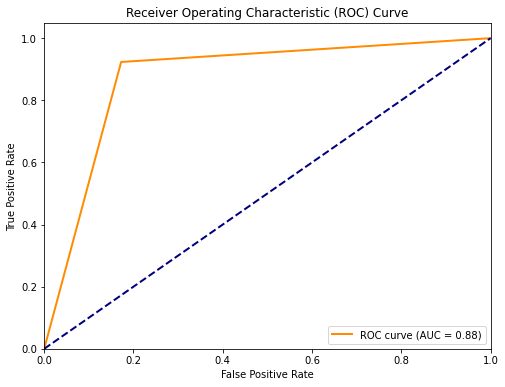

In [101]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(model, xf, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')







C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Fold 1: Accuracy = 0.85
Fold 2: Accuracy = 0.86
Fold 3: Accuracy = 0.85
Fold 4: Accuracy = 0.89
Fold 5: Accuracy = 0.86
Mean Accuracy: 0.86
Standard Deviation: 0.01


C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vishesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

### Mean accuracy of 86% is close to actual model accuracy on test hence model is performing good.

In [103]:
### Applying NaiveBayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [104]:
y_pred = model.predict(x_test)
y_pred_train=model.predict(x_train)

In [105]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.64      0.89      0.75       731
           1       0.83      0.51      0.63       744

    accuracy                           0.70      1475
   macro avg       0.74      0.70      0.69      1475
weighted avg       0.74      0.70      0.69      1475



In [106]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       0.64      0.90      0.75      1726
           1       0.83      0.50      0.62      1713

    accuracy                           0.70      3439
   macro avg       0.74      0.70      0.69      3439
weighted avg       0.74      0.70      0.69      3439



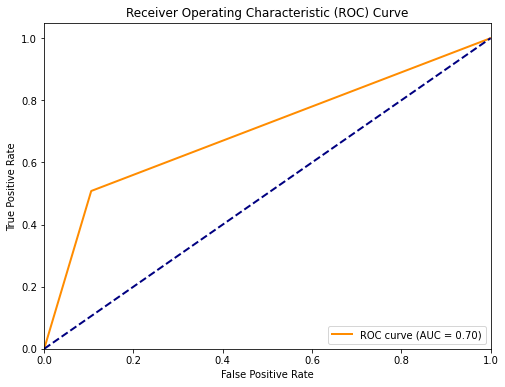

In [107]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(model, xf, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')


Fold 1: Accuracy = 0.72
Fold 2: Accuracy = 0.71
Fold 3: Accuracy = 0.69
Fold 4: Accuracy = 0.73
Fold 5: Accuracy = 0.66
Mean Accuracy: 0.70
Standard Deviation: 0.03


#### Model Performing ok

In [109]:
### Applying KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [110]:
y_pred = NNH.predict(x_test)
y_pred_train=NNH.predict(x_train)

In [111]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       731
           1       1.00      0.89      0.94       744

    accuracy                           0.94      1475
   macro avg       0.95      0.94      0.94      1475
weighted avg       0.95      0.94      0.94      1475



In [112]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00      1713

    accuracy                           1.00      3439
   macro avg       1.00      1.00      1.00      3439
weighted avg       1.00      1.00      1.00      3439



In [113]:
### Changing no. of neighbors to remove owerfitting

NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [114]:
y_pred = NNH.predict(x_test)
y_pred_train=NNH.predict(x_train)

In [115]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       731
           1       1.00      0.92      0.96       744

    accuracy                           0.96      1475
   macro avg       0.96      0.96      0.96      1475
weighted avg       0.96      0.96      0.96      1475



In [116]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00      1713

    accuracy                           1.00      3439
   macro avg       1.00      1.00      1.00      3439
weighted avg       1.00      1.00      1.00      3439



In [117]:
###KNN is owerfitting moving to next model

In [118]:
### Applying Decsion tree
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [119]:
y_pred = dtree.predict(x_test)
y_pred_train=dtree.predict(x_train)

In [120]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       731
           1       0.98      0.95      0.96       744

    accuracy                           0.96      1475
   macro avg       0.97      0.96      0.96      1475
weighted avg       0.97      0.96      0.96      1475



In [121]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00      1713

    accuracy                           1.00      3439
   macro avg       1.00      1.00      1.00      3439
weighted avg       1.00      1.00      1.00      3439



In [122]:
### Pruning decsion tree

dtree= DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=12)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=1)

In [123]:
y_pred = dtree.predict(x_test)
y_pred_train=dtree.predict(x_train)

In [124]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       731
           1       0.95      0.87      0.91       744

    accuracy                           0.91      1475
   macro avg       0.92      0.91      0.91      1475
weighted avg       0.92      0.91      0.91      1475



In [125]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1726
           1       0.98      0.93      0.95      1713

    accuracy                           0.96      3439
   macro avg       0.96      0.96      0.96      3439
weighted avg       0.96      0.96      0.96      3439



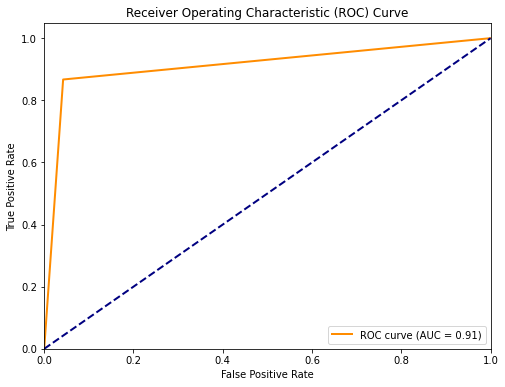

In [126]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [127]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(dtree, xf, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

Fold 1: Accuracy = 0.91
Fold 2: Accuracy = 0.92
Fold 3: Accuracy = 0.90
Fold 4: Accuracy = 0.92
Fold 5: Accuracy = 0.90
Mean Accuracy: 0.91
Standard Deviation: 0.01


#### Model performance quite significant

In [128]:
### Using Ensemble models
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier

In [129]:
## bagging

bgcl = BaggingClassifier(base_estimator=dtree, n_estimators=50,random_state=1)


bgcl = bgcl.fit(x_train, y_train)

In [130]:
y_pred = bgcl.predict(x_test)
y_pred_train=bgcl.predict(x_train)

In [131]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       731
           1       0.98      0.96      0.97       744

    accuracy                           0.97      1475
   macro avg       0.97      0.97      0.97      1475
weighted avg       0.97      0.97      0.97      1475



In [132]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1726
           1       1.00      0.98      0.99      1713

    accuracy                           0.99      3439
   macro avg       0.99      0.99      0.99      3439
weighted avg       0.99      0.99      0.99      3439



In [133]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(bgcl, xf, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

Fold 1: Accuracy = 0.95
Fold 2: Accuracy = 0.96
Fold 3: Accuracy = 0.94
Fold 4: Accuracy = 0.95
Fold 5: Accuracy = 0.96
Mean Accuracy: 0.95
Standard Deviation: 0.01


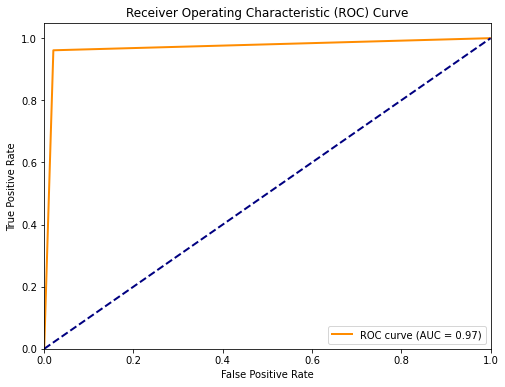

In [134]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [135]:
### Ada boosting

base_tree = DecisionTreeClassifier()
abc = AdaBoostClassifier(base_estimator=base_tree,random_state=1)
abc.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

In [136]:
y_pred = abc.predict(x_test)
y_pred_train=abc.predict(x_train)

In [137]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       731
           1       0.98      0.96      0.97       744

    accuracy                           0.97      1475
   macro avg       0.97      0.97      0.97      1475
weighted avg       0.97      0.97      0.97      1475



In [138]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00      1713

    accuracy                           1.00      3439
   macro avg       1.00      1.00      1.00      3439
weighted avg       1.00      1.00      1.00      3439



In [139]:
#### Owerfitting in Adaboosting tuning the parameters(using pruned decision tree from earlier part)

In [140]:
basetree= DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=3)
abc = AdaBoostClassifier(base_estimator=basetree,random_state=1)
abc.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   random_state=1)

In [141]:
y_pred = abc.predict(x_test)
y_pred_train=abc.predict(x_train)

In [142]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       731
           1       0.96      0.97      0.96       744

    accuracy                           0.96      1475
   macro avg       0.96      0.96      0.96      1475
weighted avg       0.96      0.96      0.96      1475



In [143]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1726
           1       0.97      0.97      0.97      1713

    accuracy                           0.97      3439
   macro avg       0.97      0.97      0.97      3439
weighted avg       0.97      0.97      0.97      3439



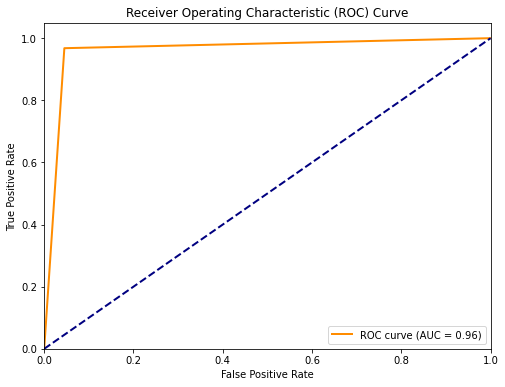

In [144]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [145]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(abc, xf, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

Fold 1: Accuracy = 0.90
Fold 2: Accuracy = 0.92
Fold 3: Accuracy = 0.89
Fold 4: Accuracy = 0.93
Fold 5: Accuracy = 0.93
Mean Accuracy: 0.91
Standard Deviation: 0.01


In [146]:
### Gradientboosting

In [147]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [148]:
y_pred = gbc.predict(x_test)
y_pred_train=gbc.predict(x_train)

In [149]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       731
           1       0.90      0.94      0.92       744

    accuracy                           0.91      1475
   macro avg       0.92      0.91      0.91      1475
weighted avg       0.92      0.91      0.91      1475



In [150]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1726
           1       0.91      0.93      0.92      1713

    accuracy                           0.92      3439
   macro avg       0.92      0.92      0.92      3439
weighted avg       0.92      0.92      0.92      3439



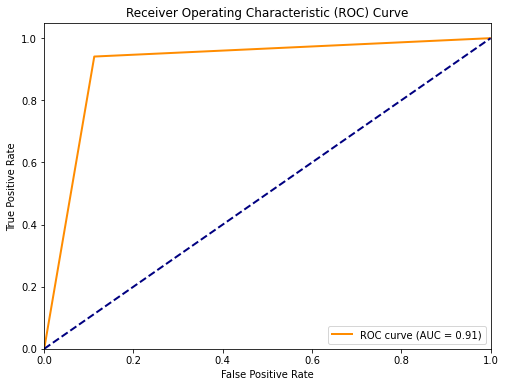

In [151]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [152]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(gbc, xf, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

Fold 1: Accuracy = 0.88
Fold 2: Accuracy = 0.87
Fold 3: Accuracy = 0.88
Fold 4: Accuracy = 0.90
Fold 5: Accuracy = 0.87
Mean Accuracy: 0.88
Standard Deviation: 0.01


In [153]:
### Applying XGboost

In [154]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [155]:
y_pred = xgb.predict(x_test)
y_pred_train=xgb.predict(x_train)

In [156]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       731
           1       0.99      0.99      0.99       744

    accuracy                           0.99      1475
   macro avg       0.99      0.99      0.99      1475
weighted avg       0.99      0.99      0.99      1475



In [157]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00      1713

    accuracy                           1.00      3439
   macro avg       1.00      1.00      1.00      3439
weighted avg       1.00      1.00      1.00      3439



In [158]:
## XGboost is owerfitting hence hyperparameter tuning in order to solve owerfitting

In [159]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the best model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Best Model: {accuracy:.2f}")

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Accuracy of Best Model: 0.99


In [160]:
params = {
    'n_estimators': 300,
    'learning_rate': 0.2,
    'max_depth': 5,
}
xgb = XGBClassifier(**params)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [161]:
y_pred = xgb.predict(x_test)
y_pred_train=xgb.predict(x_train)

In [162]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       731
           1       0.99      0.99      0.99       744

    accuracy                           0.99      1475
   macro avg       0.99      0.99      0.99      1475
weighted avg       0.99      0.99      0.99      1475



In [163]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00      1713

    accuracy                           1.00      3439
   macro avg       1.00      1.00      1.00      3439
weighted avg       1.00      1.00      1.00      3439



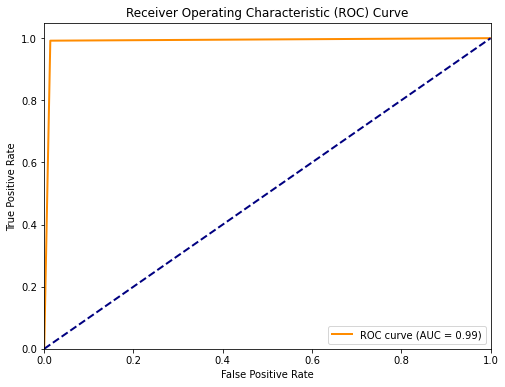

In [164]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [165]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(xgb, xf, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

Fold 1: Accuracy = 0.95
Fold 2: Accuracy = 0.96
Fold 3: Accuracy = 0.95
Fold 4: Accuracy = 0.96
Fold 5: Accuracy = 0.96
Mean Accuracy: 0.96
Standard Deviation: 0.01


In [166]:
xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Min_run_given_1over             2930 non-null   float64
 1   Min_run_scored_1over            2930 non-null   float64
 2   Max_run_given_1over             2930 non-null   float64
 3   extra_bowls_opponent            2930 non-null   float64
 4   Players_scored_zero             2930 non-null   int64  
 5   Match_light_type_Day            2930 non-null   uint8  
 6   Match_light_type_Day and Night  2930 non-null   uint8  
 7   Match_light_type_Night          2930 non-null   uint8  
 8   Match_format_ODI                2930 non-null   uint8  
 9   Match_format_Test               2930 non-null   uint8  
 10  Bowlers_in_team_3.0             2930 non-null   uint8  
 11  Bowlers_in_team_4.0             2930 non-null   uint8  
 12  Bowlers_in_team_5.0             29

In [167]:
### As there is no test match data available hence taking same strngth of australia and england


next_match_conditions1 = {
    'Opponent_Australia': 1,  
    'Match_light_type_Day': 1,  
    'Season_Rainy': 1, 
    'Match_format_Test':1,
    'Offshore_Yes':1
}



z=xf.columns

next_match_data = pd.DataFrame(columns=z,dtype='int')
next_match_data = next_match_data.append(next_match_conditions1, ignore_index=True)


predictions = xgb.predict(next_match_data)

if predictions[0] == 1:
    print("Your model predicts a win against England")
else:
    print("Your model predicts a loss against England")



Your model predicts a win against England


C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\2483279222.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_data = next_match_data.append(next_match_conditions1, ignore_index=True)


In [168]:
### As there is no T20 match data available hence taking same strength of australia and south africa equal 

next_match_conditions2 = {
    'Opponent_South Africa': 1,  
    'Match_light_type_Day and Night': 1,  
    'Season_Winter': 1, 
    'Match_format_T20':1,
    'Offshore_No':1
}

next_match_data = next_match_data.append(next_match_conditions2, ignore_index=True)

predictions = xgb.predict(next_match_data)

if predictions[1] == 1:
    print("Your model predicts a win against Australia")
else:
    print("Your model predicts a loss against Australia")

Your model predicts a win against Australia


C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\1875980160.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_data = next_match_data.append(next_match_conditions2, ignore_index=True)


In [169]:
### As there is no T20 match data available hence taking same strength of australia and south africa equal 

next_match_conditions3 = {
    'Opponent_South Africa': 1,  
    'Match_light_type_Day and Night': 1,  
    'Season_Winter': 1, 
    'Match_format_T20':1,
    'Offshore_No':1
}

next_match_data = next_match_data.append(next_match_conditions3, ignore_index=True)

predictions = xgb.predict(next_match_data)

if predictions[2] == 1:
    print("Your model predicts a win against Australia")
else:
    print("Your model predicts a loss against Australia")

C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\1014140581.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_data = next_match_data.append(next_match_conditions3, ignore_index=True)


Your model predicts a win against Australia


In [170]:

next_match_conditions4 = {
    'Opponent_Srilanka': 1,  
    'Match_light_type_Day and Night': 1,  
    'Season_Winter': 1, 
    'Match_format_ODI':1,
    'Offshore_No':1
}

next_match_data = next_match_data.append(next_match_conditions4, ignore_index=True)

predictions = xgb.predict(next_match_data)

if predictions[3] == 1:
    print("Your model predicts a win against Sri Lanka")
else:
    print("Your model predicts a loss against Sri Lanka")

Your model predicts a win against Sri Lanka


C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\87601560.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_data = next_match_data.append(next_match_conditions4, ignore_index=True)


In [171]:
next_match_conditions5 = {
    'Opponent_Srilanka': 1,  
    'Match_light_type_Day and Night': 1,  
    'Season_Winter': 1, 
    'Match_format_ODI':1,
    'Offshore_Yes':1
}

next_match_data = next_match_data.append(next_match_conditions5, ignore_index=True)

predictions = xgb.predict(next_match_data)

if predictions[4] == 1:
    print("Your model predicts a win against Sri Lanka")
else:
    print("Your model predicts a loss against Sri Lanka")

Your model predicts a win against Sri Lanka


C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\3565982212.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_data = next_match_data.append(next_match_conditions5, ignore_index=True)


In [172]:
# Get feature importances
importances = xgb.get_booster().get_fscore()

# Sort feature importances in descending order
importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}

# Get feature names
feature_names = xf.columns

importances





{'extra_bowls_opponent': 671.0,
 'Min_run_given_1over': 445.0,
 'Min_run_scored_1over': 369.0,
 'Max_run_given_1over': 333.0,
 'Players_scored_zero': 317.0,
 'Season_Rainy': 194.0,
 'Bowlers_in_team_3.0': 192.0,
 'Bowlers_in_team_4.0': 178.0,
 'Offshore_No': 169.0,
 'Max_wicket_taken_1over_4': 169.0,
 'All_rounder_in_team_1.0': 143.0,
 'Max_wicket_taken_1over_3': 142.0,
 'Opponent_Srilanka': 139.0,
 'Opponent_South Africa': 138.0,
 'All_rounder_in_team_3.0': 136.0,
 'Season_Summer': 135.0,
 'First_selection_Batting': 128.0,
 'Max_wicket_taken_1over_1': 128.0,
 'Match_light_type_Day': 125.0,
 'All_rounder_in_team_4.0': 124.0,
 'Season_Winter': 111.0,
 'Match_light_type_Day and Night': 99.0,
 'All_rounder_in_team_2.0': 94.0,
 'Opponent_Zimbabwe': 88.0,
 'First_selection_Bowling': 87.0,
 'Match_format_ODI': 85.0,
 'Max_wicket_taken_1over_2': 71.0,
 'Opponent_Pakistan': 61.0,
 'Opponent_Bangladesh': 55.0,
 'Bowlers_in_team_5.0': 43.0,
 'Match_light_type_Night': 40.0,
 'Opponent_England': 3

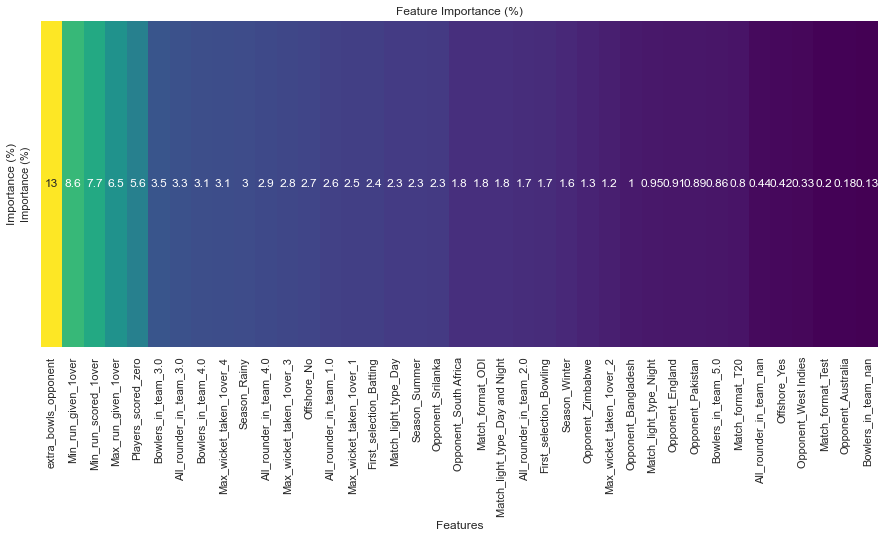

In [173]:
feature_importance ={'extra_bowls_opponent': 698.0,
 'Min_run_given_1over': 470.0,
 'Min_run_scored_1over': 423.0,
 'Max_run_given_1over': 356.0,
 'Players_scored_zero': 304.0,
 'Bowlers_in_team_3.0': 189.0,
 'All_rounder_in_team_3.0': 179.0,
 'Bowlers_in_team_4.0': 171.0,
 'Max_wicket_taken_1over_4': 168.0,
 'Season_Rainy': 165.0,
 'All_rounder_in_team_4.0': 160.0,
 'Max_wicket_taken_1over_3': 153.0,
 'Offshore_No': 150.0,
 'All_rounder_in_team_1.0': 140.0,
 'Max_wicket_taken_1over_1': 135.0,
 'First_selection_Batting': 134.0,
 'Match_light_type_Day': 128.0,
 'Season_Summer': 127.0,
 'Opponent_Srilanka': 124.0,
 'Match_format_ODI': 101.0,
 'Opponent_South Africa': 101.0,
 'Match_light_type_Day and Night': 100.0,
 'All_rounder_in_team_2.0': 95.0,
 'First_selection_Bowling': 93.0,
 'Season_Winter': 85.0,
 'Opponent_Zimbabwe': 73.0,
 'Max_wicket_taken_1over_2': 65.0,
 'Opponent_Bangladesh': 55.0,
 'Match_light_type_Night': 52.0,
 'Opponent_England': 50.0,
 'Opponent_Pakistan': 49.0,
 'Bowlers_in_team_5.0': 47.0,
 'Match_format_T20': 44.0,
 'All_rounder_in_team_nan': 24.0,
 'Offshore_Yes': 23.0,
 'Opponent_West Indies': 18.0,
 'Match_format_Test': 11.0,
 'Opponent_Australia': 10.0,
 'Bowlers_in_team_nan': 7.0}

# Convert the dictionary to a DataFrame
importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['Importance'])

importance_df['Importance (%)'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100


# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.heatmap(importance_df[['Importance (%)']].transpose(), cmap='viridis', annot=True, cbar=False)
plt.title('Feature Importance (%)')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()





In [174]:
### Filling these important features and then seeing the change in the prediction. Taking first five

df3.groupby(['Opponent'])['extra_bowls_opponent'].median()


Opponent
Australia       2.0
Bangladesh      7.0
England         5.0
Kenya           2.0
Pakistan        4.0
South Africa    4.0
Srilanka        2.0
West Indies     7.0
Zimbabwe        2.0
Name: extra_bowls_opponent, dtype: float64

In [175]:
df3.groupby(['Opponent'])['Min_run_given_1over'].median()

Opponent
Australia       2.0
Bangladesh      2.0
England         3.0
Kenya           2.5
Pakistan        3.0
South Africa    0.0
Srilanka        3.0
West Indies     3.0
Zimbabwe        0.0
Name: Min_run_given_1over, dtype: float64

In [176]:
df3.groupby(['Opponent'])['Min_run_scored_1over'].median()

Opponent
Australia       3.0
Bangladesh      3.0
England         3.0
Kenya           3.0
Pakistan        3.0
South Africa    3.0
Srilanka        3.0
West Indies     3.0
Zimbabwe        3.0
Name: Min_run_scored_1over, dtype: float64

In [177]:
df3.groupby(['Opponent'])['Max_run_given_1over'].median()

Opponent
Australia        6.0
Bangladesh      12.5
England          7.0
Kenya            6.0
Pakistan         7.0
South Africa     7.0
Srilanka         6.0
West Indies      9.0
Zimbabwe         6.0
Name: Max_run_given_1over, dtype: float64

In [178]:
df3.groupby(['Opponent'])['Players_scored_zero'].median()

Opponent
Australia       3.0
Bangladesh      3.0
England         3.0
Kenya           3.0
Pakistan        3.0
South Africa    3.0
Srilanka        3.0
West Indies     3.0
Zimbabwe        3.0
Name: Players_scored_zero, dtype: float64

In [179]:
#### we will use above conditions against opponent England and see change in the result

next_match_conditions1 = {
    'Opponent_Australia': 1,  
    'Match_light_type_Day': 1,  
    'Season_Rainy': 1, 
    'Match_format_Test':1,
    'Offshore_Yes':1,
    'extra_bowls_opponent':5,
    'Min_run_given_1over':3,
    'Min_run_scored_1over':3,
    'Max_run_given_1over':7,
    'Players_scored_zero':3
}



zp=xf.columns

next_match_data = pd.DataFrame(columns=zp,dtype='int')
next_match_data = next_match_data.append(next_match_conditions1, ignore_index=True)


predictions = xgb.predict(next_match_data)

if predictions[0] == 1:
    print("Your model predicts a win against England")
else:
    print("Your model predicts a loss against England")



Your model predicts a win against England


C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\3345738024.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_data = next_match_data.append(next_match_conditions1, ignore_index=True)


In [180]:
next_match_conditions2 = {
    'Opponent_South Africa': 1,  
    'Match_light_type_Day and Night': 1,  
    'Season_Winter': 1, 
    'Match_format_T20':1,
    'Offshore_No':1,
    'extra_bowls_opponent':5,
    'Min_run_given_1over':3,
    'Min_run_scored_1over':3,
    'Max_run_given_1over':7,
    'Players_scored_zero':3
}

next_match_data = next_match_data.append(next_match_conditions2, ignore_index=True)

predictions = xgb.predict(next_match_data)

if predictions[1] == 1:
    print("Your model predicts a win against Australia")
else:
    print("Your model predicts a loss against Australia")

Your model predicts a win against Australia


C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\999735901.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_data = next_match_data.append(next_match_conditions2, ignore_index=True)


In [181]:
predictions

array([1, 1])

In [182]:
next_match_conditions3 = {
    'Opponent_South Africa': 1,  
    'Match_light_type_Day and Night': 1,  
    'Season_Winter': 1, 
    'Match_format_T20':1,
    'Offshore_No':1,
    'extra_bowls_opponent':5,
    'Min_run_given_1over':3,
    'Min_run_scored_1over':3,
    'Max_run_given_1over':7,
    'Players_scored_zero':3
}

next_match_data = next_match_data.append(next_match_conditions3, ignore_index=True)

predictions = xgb.predict(next_match_data)

if predictions[2] == 1:
    print("Your model predicts a win against Australia")
else:
    print("Your model predicts a loss against Australia")

Your model predicts a win against Australia


C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\111407881.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_data = next_match_data.append(next_match_conditions3, ignore_index=True)


In [183]:
predictions

array([1, 1, 1])

In [184]:
next_match_data

,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,Players_scored_zero,Match_light_type_Day,Match_light_type_Day and Night,Match_light_type_Night,Match_format_ODI,Match_format_Test,...,Season_Rainy,Season_Summer,Season_Winter,Offshore_No,Offshore_Yes,Max_wicket_taken_1over_1,Max_wicket_taken_1over_2,Max_wicket_taken_1over_3,Max_wicket_taken_1over_4,Match_format_T20
0,3,3,7,5,3,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,3,3,7,5,3,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2,3,3,7,5,3,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0


In [185]:
next_match_conditions4 = {
    'Opponent_Srilanka': 1,  
    'Match_light_type_Day and Night': 1,  
    'Season_Winter': 1, 
    'Match_format_ODI':1,
    'Offshore_No':1,
    'extra_bowls_opponent':5,
    'Min_run_given_1over':3,
    'Min_run_scored_1over':3,
    'Max_run_given_1over':7,
    'Players_scored_zero':3
    
}

next_match_data = next_match_data.append(next_match_conditions4, ignore_index=True)

predictions = xgb.predict(next_match_data)

if predictions[3] == 1:
    print("Your model predicts a win against Sri Lanka")
else:
    print("Your model predicts a loss against Sri Lanka")

Your model predicts a win against Sri Lanka


C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\1360522595.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_data = next_match_data.append(next_match_conditions4, ignore_index=True)


In [186]:
next_match_conditions5 = {
    'Opponent_Srilanka': 1,  
    'Match_light_type_Day and Night': 1,  
    'Season_Winter': 1, 
    'Match_format_ODI':1,
    'Offshore_Yes':1,
    'extra_bowls_opponent':5,
    'Min_run_given_1over':3,
    'Min_run_scored_1over':3,
    'Max_run_given_1over':7,
    'Players_scored_zero':3
    
}

next_match_data = next_match_data.append(next_match_conditions5, ignore_index=True)

predictions = xgb.predict(next_match_data)

if predictions[4] == 1:
    print("Your model predicts a win against Sri Lanka")
else:
    print("Your model predicts a loss against Sri Lanka")

C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\1065153005.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_data = next_match_data.append(next_match_conditions5, ignore_index=True)


Your model predicts a win against Sri Lanka


In [187]:
### Now we will create new dataset with onle selected feature from the score and train on it and see the change in result.

b=['extra_bowls_opponent','Min_run_given_1over','Min_run_scored_1over','Max_run_given_1over','Players_scored_zero','Opponent_Srilanka','Match_light_type_Day and Night','Season_Winter','Match_format_ODI','Offshore_Yes','Offshore_No','Match_format_T20','Opponent_Australia','Opponent_South Africa','Match_light_type_Day','Season_Rainy','Match_format_Test','Opponent_England']

In [188]:
xz=xf[b]

In [189]:
xz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   extra_bowls_opponent            2930 non-null   float64
 1   Min_run_given_1over             2930 non-null   float64
 2   Min_run_scored_1over            2930 non-null   float64
 3   Max_run_given_1over             2930 non-null   float64
 4   Players_scored_zero             2930 non-null   int64  
 5   Opponent_Srilanka               2930 non-null   uint8  
 6   Match_light_type_Day and Night  2930 non-null   uint8  
 7   Season_Winter                   2930 non-null   uint8  
 8   Match_format_ODI                2930 non-null   uint8  
 9   Offshore_Yes                    2930 non-null   uint8  
 10  Offshore_No                     2930 non-null   uint8  
 11  Match_format_T20                2930 non-null   uint8  
 12  Opponent_Australia              29

In [190]:
oversample= SMOTE()
x1,y1=oversample.fit_resample(xz,y)

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=1)

In [192]:
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [193]:
y_pred = xgb.predict(x_test)
y_pred_train=xgb.predict(x_train)

In [194]:
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       731
           1       0.97      0.94      0.95       744

    accuracy                           0.95      1475
   macro avg       0.95      0.95      0.95      1475
weighted avg       0.96      0.95      0.95      1475



In [195]:
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1726
           1       0.98      0.97      0.97      1713

    accuracy                           0.97      3439
   macro avg       0.97      0.97      0.97      3439
weighted avg       0.97      0.97      0.97      3439



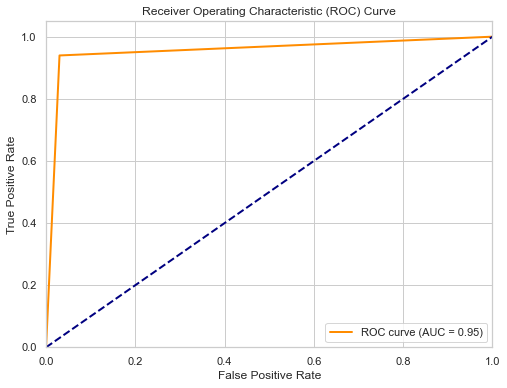

In [196]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [197]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(xgb, xz, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

Fold 1: Accuracy = 0.91
Fold 2: Accuracy = 0.92
Fold 3: Accuracy = 0.92
Fold 4: Accuracy = 0.93
Fold 5: Accuracy = 0.92
Mean Accuracy: 0.92
Standard Deviation: 0.01


In [198]:
xz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   extra_bowls_opponent            2930 non-null   float64
 1   Min_run_given_1over             2930 non-null   float64
 2   Min_run_scored_1over            2930 non-null   float64
 3   Max_run_given_1over             2930 non-null   float64
 4   Players_scored_zero             2930 non-null   int64  
 5   Opponent_Srilanka               2930 non-null   uint8  
 6   Match_light_type_Day and Night  2930 non-null   uint8  
 7   Season_Winter                   2930 non-null   uint8  
 8   Match_format_ODI                2930 non-null   uint8  
 9   Offshore_Yes                    2930 non-null   uint8  
 10  Offshore_No                     2930 non-null   uint8  
 11  Match_format_T20                2930 non-null   uint8  
 12  Opponent_Australia              29

In [199]:
next_match_conditions1 = {
    'Opponent_Australia': 1,  
    'Match_light_type_Day': 1,  
    'Season_Rainy': 1, 
    'Match_format_Test':1,
    'Offshore_Yes':1,
    'extra_bowls_opponent':5,
    'Min_run_given_1over':3,
    'Min_run_scored_1over':3,
    'Max_run_given_1over':7,
    'Players_scored_zero':3,
    'Opponent_Srilanka':0,
    'Opponent_South Africa':0,
    'Match_format_T20':0,
    'Offshore_No':0,
    'Match_format_ODI':0,
    'Season_Winter':0,
    'Match_light_type_Day and Night':0,
}



zk=xz.columns

next_match_dataz = pd.DataFrame(columns=zk,dtype='int')
next_match_dataz = next_match_dataz.append(next_match_conditions1, ignore_index=True)


predictionsn = xgb.predict(next_match_dataz)

if predictionsn[0] == 1:
    print("Your model predicts a win against England")
else:
    print("Your model predicts a loss against England")



Your model predicts a win against England


C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\4224775569.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_dataz = next_match_dataz.append(next_match_conditions1, ignore_index=True)


In [200]:
next_match_conditions2 = {
    'Opponent_South Africa': 1,  
    'Match_light_type_Day and Night': 1,  
    'Season_Winter': 1, 
    'Match_format_T20':1,
    'Offshore_No':1,
    'extra_bowls_opponent':5,
    'Min_run_given_1over':3,
    'Min_run_scored_1over':3,
    'Max_run_given_1over':7,
    'Players_scored_zero':3,
    'Opponent_Srilanka':0,
    'Opponent_Australia':0,
    'Offshore_Yes':0,
    'Match_format_ODI':0,
    'Season_Rainy':0,
    'Match_light_type_Day':0,
}

next_match_dataz = next_match_dataz.append(next_match_conditions2, ignore_index=True)

predictionsn = xgb.predict(next_match_dataz)

if predictionsn[1] == 1:
    print("Your model predicts a win against Australia")
else:
    print("Your model predicts a loss against Australia")

C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\419124553.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_dataz = next_match_dataz.append(next_match_conditions2, ignore_index=True)


Your model predicts a win against Australia


In [201]:
predictionsn

array([1, 1])

In [202]:
next_match_conditions3 = {
    'Opponent_South Africa': 0,  
    'Match_light_type_Day and Night': 1,  
    'Season_Winter': 0, 
    'Match_format_T20':1,
    'Offshore_No':1,
    'extra_bowls_opponent':0,
    'Min_run_given_1over':3,
    'Min_run_scored_1over':0,
    'Max_run_given_1over':7,
    'Players_scored_zero':3,
    'Opponent_Srilanka':0,
    'Opponent_Australia':1,
    'Offshore_Yes':0,
    'Match_format_ODI':0,
    'Season_Rainy':1,
    'Match_light_type_Day':0,
}

next_match_dataz = next_match_dataz.append(next_match_conditions3, ignore_index=True)

predictionsn = xgb.predict(next_match_dataz)

if predictionsn[8] == 1:
    print("Your model predicts a win against Australia")
else:
    print("Your model predicts a loss against Australia")
    
   



C:\Users\Vishesh\AppData\Local\Temp\ipykernel_10920\2307852335.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_match_dataz = next_match_dataz.append(next_match_conditions3, ignore_index=True)


IndexError: index 8 is out of bounds for axis 0 with size 3

In [203]:
df7=df3[df3['Result']==0]

In [204]:
df7.head()

,Avg_team_Age,Audience_number,Max_run_scored_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Result,...,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Offshore,Max_wicket_taken_1over,Players_scored_zero,player_highest_wicket
0,30.0,9940.0,13.0,0.0,2.0,3.0,6.0,0.0,54.0,0,...,ODI,3.0,3.0,Bowling,Srilanka,Summer,No,3,3,1
2,30.0,13146.0,14.0,0.0,0.0,3.0,6.0,0.0,69.0,0,...,T20,3.0,2.0,Bowling,Zimbabwe,Rainy,Yes,4,3,1
4,30.0,13328.0,12.0,0.0,0.0,3.0,6.0,0.0,80.0,0,...,ODI,1.0,3.0,Bowling,Srilanka,Summer,No,4,3,1
6,30.0,10983.0,12.0,0.0,0.0,4.0,6.0,0.0,70.0,0,...,T20,2.0,2.0,Batting,Zimbabwe,Summer,Yes,3,3,1
8,30.0,9940.0,13.0,0.0,2.0,3.0,6.0,0.0,54.0,0,...,ODI,3.0,3.0,Bowling,Srilanka,Summer,No,3,3,1


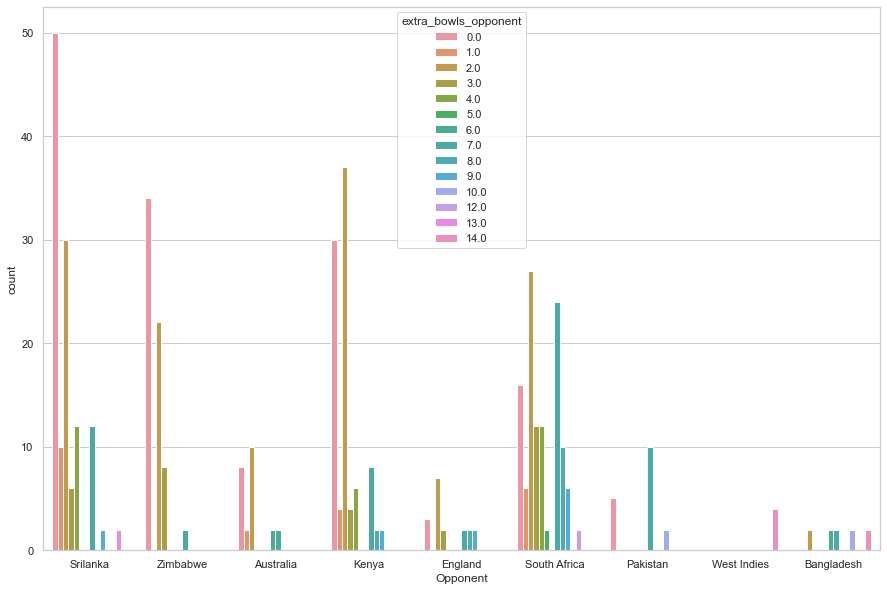

In [205]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df7, x='Opponent',hue='extra_bowls_opponent');


In [206]:
win_probabilities = xgb.predict_proba(next_match_dataz)[:, 1] 

In [207]:
win_probabilities

array([0.9999033 , 0.9998691 , 0.85041106], dtype=float32)

In [208]:
extra_bowls_opponent            
Min_run_given_1over             
Min_run_scored_1over            
Max_run_given_1over             
Players_scored_zero 

NameError: name 'extra_bowls_opponent' is not defined

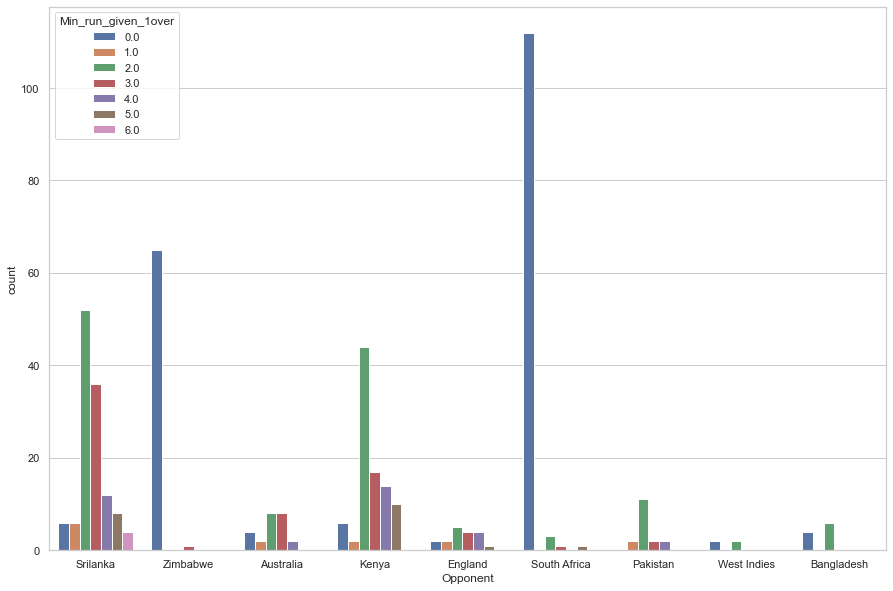

In [209]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df7, x='Opponent',hue='Min_run_given_1over');

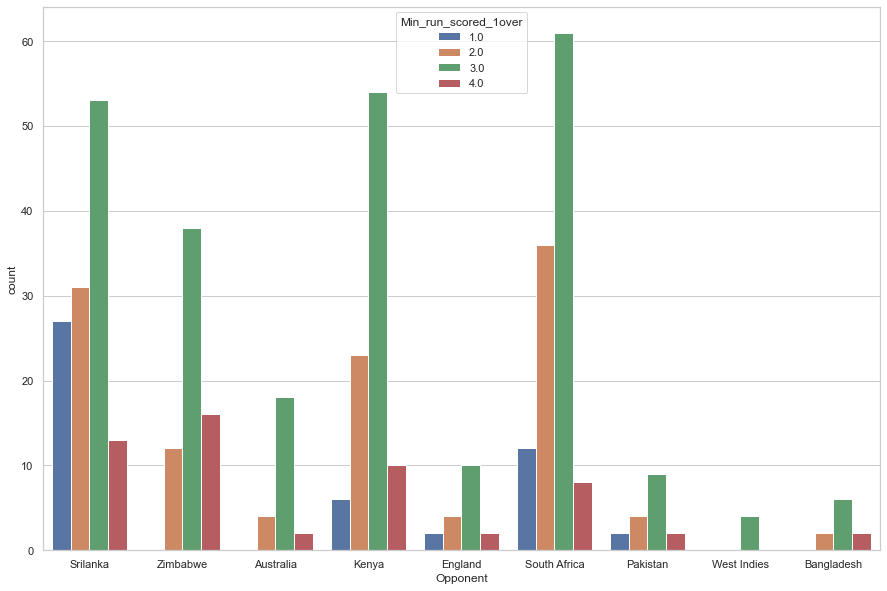

In [210]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df7, x='Opponent',hue='Min_run_scored_1over');

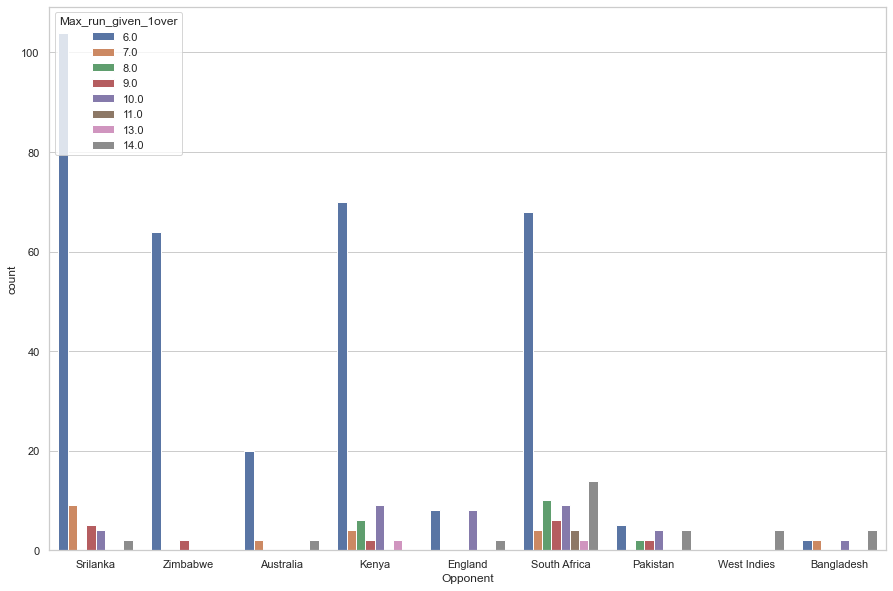

In [211]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df7, x='Opponent',hue='Max_run_given_1over');

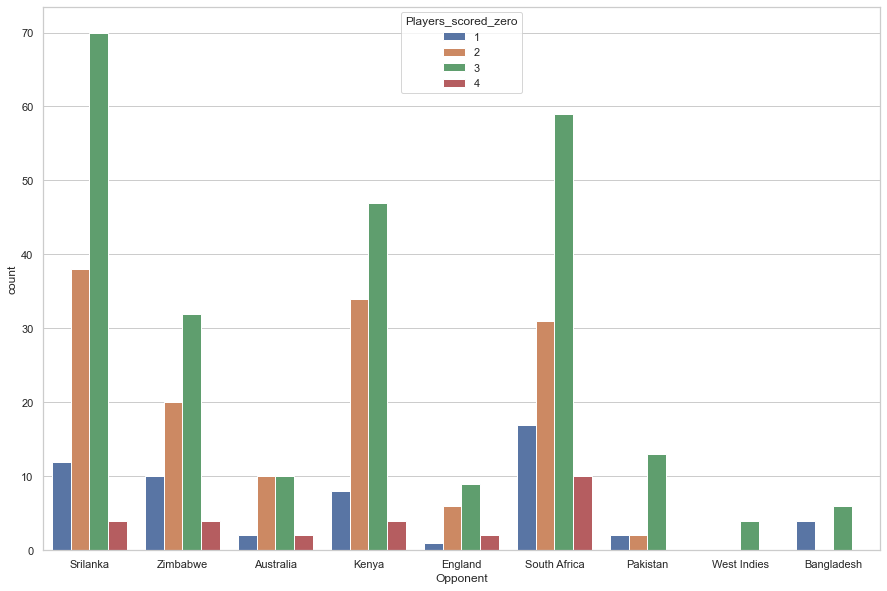

In [212]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=df7, x='Opponent',hue='Players_scored_zero');

In [213]:
extra_bowls_opponent=[0,1,2,3,4,5,6,7,8,9,10,12,13,14]            
Min_run_given_1over=[0,1,2,3,4,5,6]            
Min_run_scored_1over=[1,2,3,4]            
Max_run_given_1over=[6,7,8,9,10,11,13,14]             
Players_scored_zero =[1,2,3,4]

In [214]:
from itertools import product

In [232]:
# Define the values for the specified features
extra_bowls_opponent_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14]
Min_run_given_1over_values = [0, 1, 2, 3, 4, 5, 6]
Min_run_scored_1over_values = [1, 2, 3, 4]
Max_run_given_1over_values = [6, 7, 8, 9, 10, 11, 13, 14]
Players_scored_zero_values = [1, 2, 3, 4]

# Define the values for the 13 additional features for 5 upcoming matches
Opponent_Srilanka = [0, 0, 0, 1, 1]
Opponent_England = [1, 0, 0, 0, 0]
Opponent_Australia = [0, 1, 1, 0, 0]
Opponent_South_Africa = [0, 0, 0, 0, 0]
Match_light_type_Day_and_Night = [0, 1, 1, 1, 1]
Match_light_type_Day = [1, 0, 0, 0, 0]
Match_format_T20 = [0, 1, 1, 0, 0]
Match_format_Test = [0, 0, 0, 0, 0]
Match_format_ODI = [0, 0, 0, 1, 1]
Season_Winter = [0, 1, 1, 1, 1]
Season_Rainy = [1, 0, 0, 0, 0]
Offshore_Yes = [1, 0, 0, 0, 0]
Offshore_No = [0, 1, 1, 1, 1]

# Create a DataFrame to store the known values of additional features
additional_features_df = pd.DataFrame({
    'Opponent_Srilanka': Opponent_Srilanka,
    'Opponent_England': Opponent_England,
    'Opponent_Australia': Opponent_Australia,
    'Opponent_South Africa': Opponent_South_Africa,
    'Match_light_type_Day and Night': Match_light_type_Day_and_Night,
    'Match_light_type_Day': Match_light_type_Day,
    'Match_format_T20': Match_format_T20,
    'Match_format_Test': Match_format_Test,
    'Match_format_ODI': Match_format_ODI,
    'Season_Winter': Season_Winter,
    'Season_Rainy': Season_Rainy,
    'Offshore_Yes': Offshore_Yes,
    'Offshore_No': Offshore_No
})

# Initialize an empty list to store results
results = []

# Get the expected feature names from the model
expected_feature_names = xgb.get_booster().feature_names

# Iterate through all combinations
for extra_bowls_val in extra_bowls_opponent_values:
    for Min_run_given_val in Min_run_given_1over_values:
        for Min_run_scored_val in Min_run_scored_1over_values:
            for Max_run_given_val in Max_run_given_1over_values:
                for Players_scored_zero_val in Players_scored_zero_values:
                    # Create a DataFrame with the current combination
                    data = {
                        'extra_bowls_opponent': [extra_bowls_val],
                        'Min_run_given_1over': [Min_run_given_val],
                        'Min_run_scored_1over': [Min_run_scored_val],
                        'Max_run_given_1over': [Max_run_given_val],
                        'Players_scored_zero': [Players_scored_zero_val]
                    }
                    # Concatenate the combination DataFrame with the additional features DataFrame
                    df = pd.concat([pd.DataFrame(data)] * len(additional_features_df), ignore_index=True)
                    df = pd.concat([df, additional_features_df], axis=1)

                    # Ensure the order of columns in df matches the expected feature names
                    df = df[expected_feature_names]

                    # Use the trained model to predict probabilities for the current combination
                    win_probabilities = xgb.predict_proba(df)[:, 1]
                    

                    # Store the combination and its corresponding win probabilities
                    for i, win_probability in enumerate(win_probabilities):
                        results.append({
                            
                                'extra_bowls_opponent': extra_bowls_val,
                                'Min_run_given_1over': Min_run_given_val,
                                'Min_run_scored_1over': Min_run_scored_val,
                                'Max_run_given_1over': Max_run_given_val,
                                'Players_scored_zero': Players_scored_zero_val,
                                'additional_features': additional_features_df.iloc[i].to_dict(),
                            
                            'win_probability': win_probability
                            
                        })

# Print the results (combination and win probability)


In [233]:
result_df = pd.DataFrame(results)


In [234]:
result_df.head()

,extra_bowls_opponent,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,Players_scored_zero,additional_features,win_probability
0,0,0,1,6,1,"{'Opponent_Srilanka': 0, 'Opponent_England': 1...",0.370307
1,0,0,1,6,1,"{'Opponent_Srilanka': 0, 'Opponent_England': 0...",0.005621
2,0,0,1,6,1,"{'Opponent_Srilanka': 0, 'Opponent_England': 0...",0.005621
3,0,0,1,6,1,"{'Opponent_Srilanka': 1, 'Opponent_England': 0...",0.000105
4,0,0,1,6,1,"{'Opponent_Srilanka': 1, 'Opponent_England': 0...",0.000105


In [266]:
filtered_resultsE = result_df[result_df['additional_features'].apply(lambda x: x['Opponent_England']) == 1]

In [240]:
England_loose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 0 to 61300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   extra_bowls_opponent  807 non-null    int64  
 1   Min_run_given_1over   807 non-null    int64  
 2   Min_run_scored_1over  807 non-null    int64  
 3   Max_run_given_1over   807 non-null    int64  
 4   Players_scored_zero   807 non-null    int64  
 5   additional_features   807 non-null    object 
 6   win_probability       807 non-null    float32
dtypes: float32(1), int64(5), object(1)
memory usage: 47.3+ KB


In [263]:
England_loose.describe().T

,count,mean,std,min,25%,50%,75%,max
extra_bowls_opponent,807.0,4.195787,4.504074,0.000000,1.000000,2.000000,8.000000,14.000000
Min_run_given_1over,807.0,2.249071,1.982847,0.000000,0.000000,3.000000,4.000000,6.000000
Min_run_scored_1over,807.0,2.711276,1.026768,1.000000,2.000000,3.000000,4.000000,4.000000
Max_run_given_1over,807.0,10.282528,2.926643,6.000000,7.000000,10.000000,13.000000,14.000000
Players_scored_zero,807.0,1.698885,0.849631,1.000000,1.000000,1.000000,2.000000,4.000000
win_probability,807.0,0.301838,0.136169,0.011834,0.188483,0.323986,0.416631,0.499929


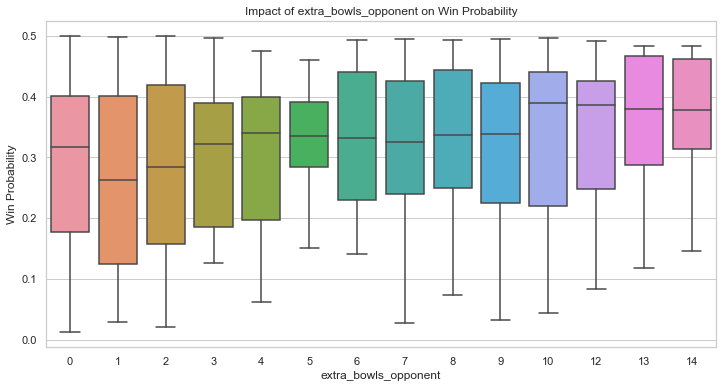

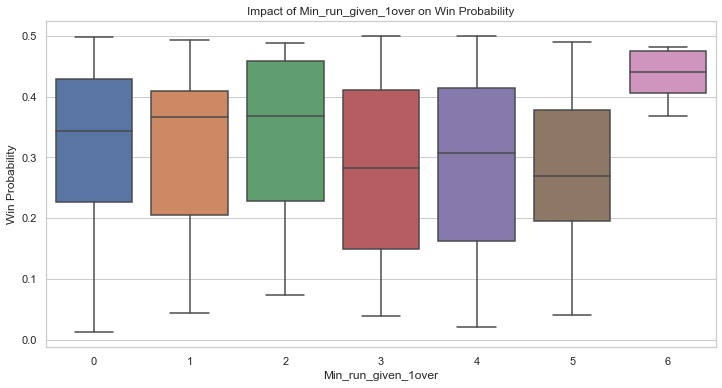

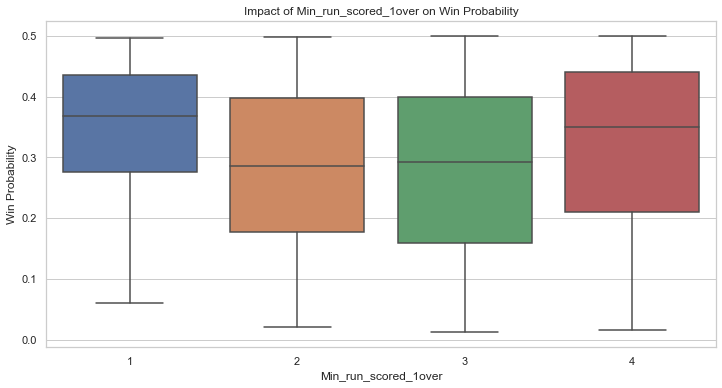

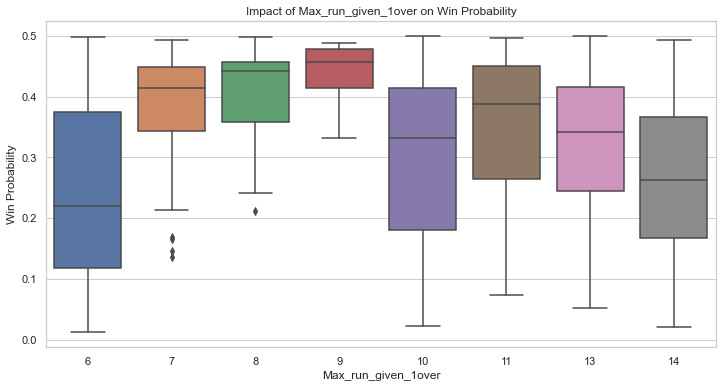

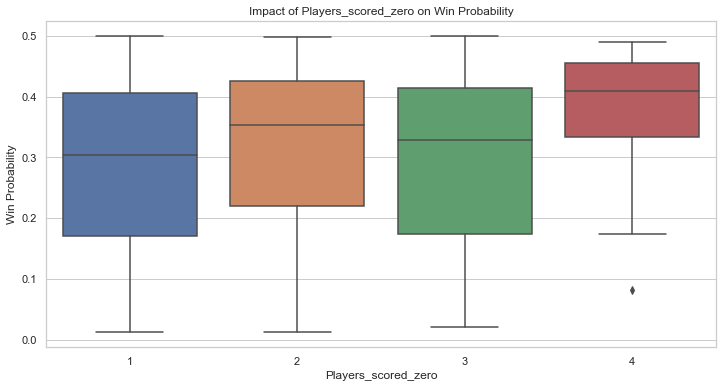

In [264]:

# Visualize the impact of 'extra_bowls_opponent' on win probabilities
plt.figure(figsize=(12, 6))
sns.boxplot(x='extra_bowls_opponent', y='win_probability', data=England_loose)
plt.title('Impact of extra_bowls_opponent on Win Probability')
plt.xlabel('extra_bowls_opponent')
plt.ylabel('Win Probability')
plt.show()

# Visualize the impact of 'Min_run_given_1over' on win probabilities
plt.figure(figsize=(12, 6))
sns.boxplot(x='Min_run_given_1over', y='win_probability', data=England_loose)
plt.title('Impact of Min_run_given_1over on Win Probability')
plt.xlabel('Min_run_given_1over')
plt.ylabel('Win Probability')
plt.show()

# Visualize the impact of 'Min_run_scored_1over' on win probabilities
plt.figure(figsize=(12, 6))
sns.boxplot(x='Min_run_scored_1over', y='win_probability', data=England_loose)
plt.title('Impact of Min_run_scored_1over on Win Probability')
plt.xlabel('Min_run_scored_1over')
plt.ylabel('Win Probability')
plt.show()

# Visualize the impact of 'Max_run_given_1over' on win probabilities
plt.figure(figsize=(12, 6))
sns.boxplot(x='Max_run_given_1over', y='win_probability', data=England_loose)
plt.title('Impact of Max_run_given_1over on Win Probability')
plt.xlabel('Max_run_given_1over')
plt.ylabel('Win Probability')
plt.show()

# Visualize the impact of 'Players_scored_zero' on win probabilities
plt.figure(figsize=(12, 6))
sns.boxplot(x='Players_scored_zero', y='win_probability', data=England_loose)
plt.title('Impact of Players_scored_zero on Win Probability')
plt.xlabel('Players_scored_zero')
plt.ylabel('Win Probability')
plt.show()


In [271]:
## FOR ENGLAND MATCH

# Filter rows where win_probability is greater than 0.5
best_combinations_df = filtered_resultsE[filtered_resultsE['win_probability'] > 0.5]

# Group by the selected features and calculate the average win probability
best_combinations_avg = best_combinations_df.groupby(['extra_bowls_opponent', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'Players_scored_zero'])['win_probability'].mean().reset_index()

# Find the combination with the highest average win probability
best_combination = best_combinations_avg.loc[best_combinations_avg['win_probability'].idxmax()]

# Print the best combination and its average win probability
print("Best Combination:")
print(best_combination)

# Print the average win probability for the best combination
print("Average Win Probability for Best Combination:", best_combination['win_probability'])


Best Combination:
extra_bowls_opponent    5.000000
Min_run_given_1over     6.000000
Min_run_scored_1over    2.000000
Max_run_given_1over     8.000000
Players_scored_zero     4.000000
win_probability         0.999997
Name: 4763, dtype: float64
Average Win Probability for Best Combination: 0.9999970197677612


In [272]:
filtered_resultsA = result_df[result_df['additional_features'].apply(lambda x: x['Opponent_Australia']) == 1]


In [274]:
## FOR Australia MATCHES

# Filter rows where win_probability is greater than 0.5
best_combinations_df = filtered_resultsA[filtered_resultsA['win_probability'] > 0.5]

# Group by the selected features and calculate the average win probability
best_combinations_avg = best_combinations_df.groupby(['extra_bowls_opponent', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'Players_scored_zero'])['win_probability'].mean().reset_index()

# Find the combination with the highest average win probability
best_combination = best_combinations_avg.loc[best_combinations_avg['win_probability'].idxmax()]

# Print the best combination and its average win probability
print("Best Combination:")
print(best_combination)

# Print the average win probability for the best combination
print("Average Win Probability for Best Combination:", best_combination['win_probability'])

Best Combination:
extra_bowls_opponent     9.000000
Min_run_given_1over      6.000000
Min_run_scored_1over     4.000000
Max_run_given_1over     13.000000
Players_scored_zero      2.000000
win_probability          0.999994
Name: 8396, dtype: float64
Average Win Probability for Best Combination: 0.9999942779541016


In [275]:
filtered_resultsS = result_df[result_df['additional_features'].apply(lambda x: x['Opponent_Srilanka']) == 1]

In [276]:
## FOR Srilanka MATCHES

# Filter rows where win_probability is greater than 0.5
best_combinations_df = filtered_resultsS[filtered_resultsS['win_probability'] > 0.5]

# Group by the selected features and calculate the average win probability
best_combinations_avg = best_combinations_df.groupby(['extra_bowls_opponent', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'Players_scored_zero'])['win_probability'].mean().reset_index()

# Find the combination with the highest average win probability
best_combination = best_combinations_avg.loc[best_combinations_avg['win_probability'].idxmax()]

# Print the best combination and its average win probability
print("Best Combination:")
print(best_combination)

# Print the average win probability for the best combination
print("Average Win Probability for Best Combination:", best_combination['win_probability'])

Best Combination:
extra_bowls_opponent    5.000000
Min_run_given_1over     6.000000
Min_run_scored_1over    3.000000
Max_run_given_1over     8.000000
Players_scored_zero     4.000000
win_probability         0.999963
Name: 4226, dtype: float64
Average Win Probability for Best Combination: 0.9999629259109497


<AxesSubplot:>

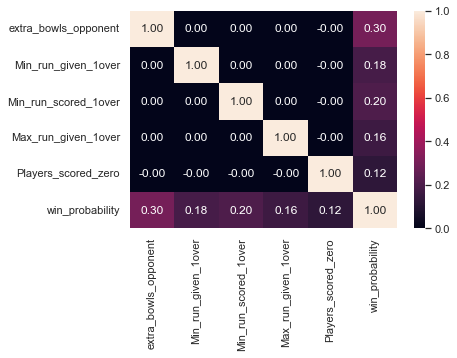

In [277]:
sns.heatmap(result_df.corr(),annot=True,fmt=".2f")

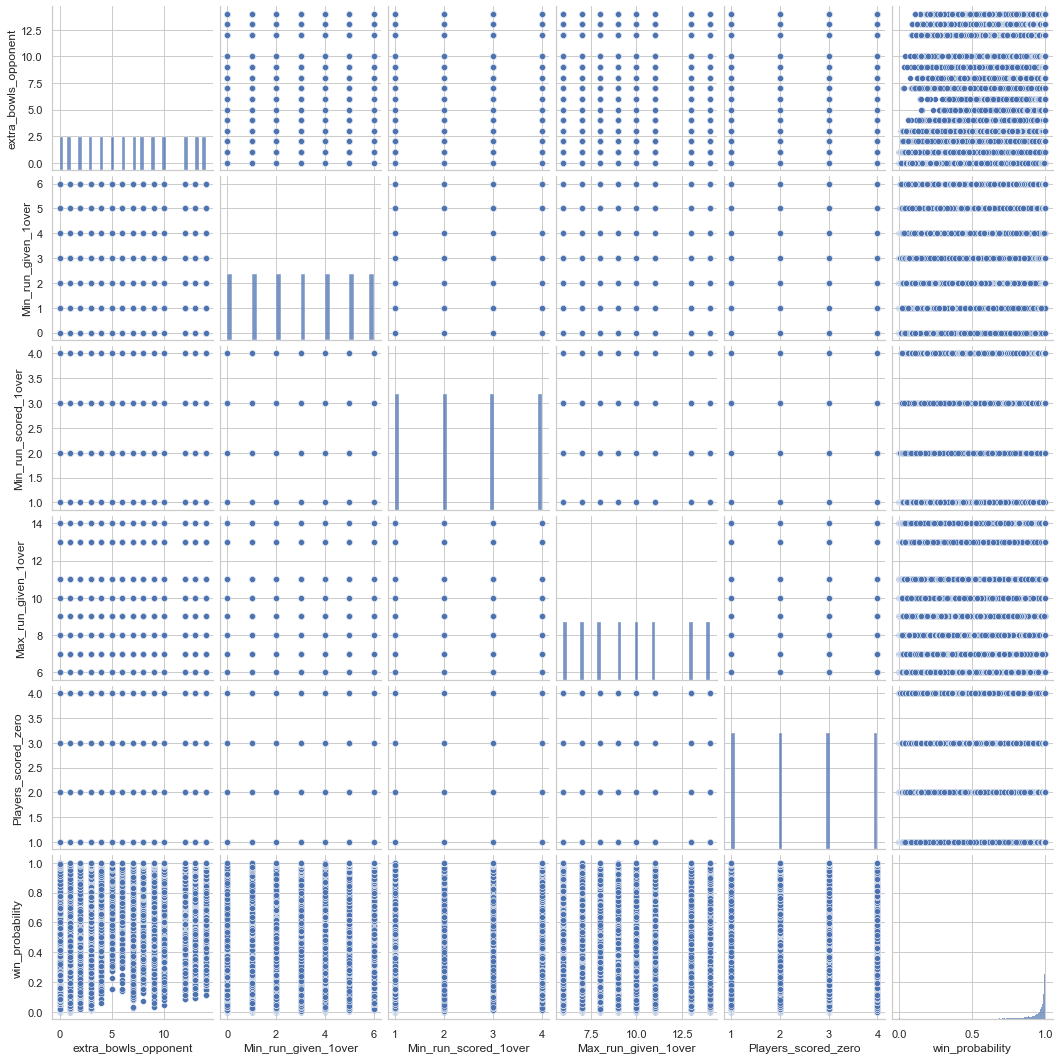

In [278]:
sns.pairplot(data=result_df)